In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind,f_oneway
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

Loading the dataset using pandas

In [2]:
train_df=pd.read_csv("Train.csv")

In [3]:
train_df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

columns in the dataset

In [4]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Missing values

In [6]:
missing_values=train_df.isnull().sum()

In [7]:
#visualization for Missing Values

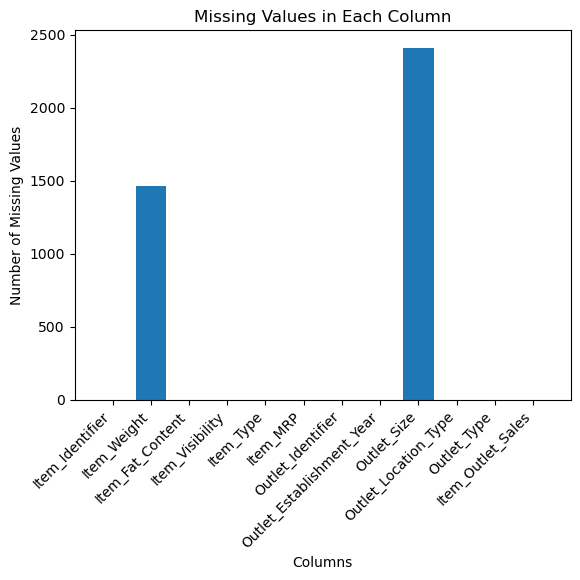

In [8]:
plt.bar(missing_values.index, missing_values.values)
# Customize the chart
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
# Display the chart
plt.show()

summary of the central tendency, dispersion, and shape of the distribution of a DataFrame's  numerical columns.

In [9]:
train_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [10]:
#finding unique values in  all columns

# Explaratory Data Analysis(EDA)

In [11]:
#finding unique values in  all columns

# item_identifier

 This column has the unique identifiers or codes for each individual item in the dataset. Each item have a distinct identifier to distinguish it from others.

In [12]:
Item_identifier_unique = train_df['Item_Identifier'].unique()
Item_identifier_unique

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [13]:
column_name = 'Item_Identifier'
value_counts = train_df[column_name].value_counts()

In [14]:
value_counts

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [15]:
print("Most occurring Item_Identifiers in", column_name, ":\n", value_counts.head())

Most occurring Item_Identifiers in Item_Identifier :
 Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: count, dtype: int64


In [16]:
print("Least occurring values in", column_name, ":\n", value_counts.tail())

Least occurring values in Item_Identifier :
 Item_Identifier
FDY43    1
FDQ60    1
FDO33    1
DRF48    1
FDC23    1
Name: count, dtype: int64


In [17]:
pivot_table = pd.pivot_table(train_df, values='Item_MRP', index='Item_Identifier', columns='Item_Type', aggfunc='mean', fill_value=0)
pivot_table

Item_Type        Baking Goods  Breads  Breakfast  Canned  Dairy  Frozen Foods  \
Item_Identifier                                                                 
DRA12                     0.0     0.0        0.0     0.0    0.0           0.0   
DRA24                     0.0     0.0        0.0     0.0    0.0           0.0   
DRA59                     0.0     0.0        0.0     0.0    0.0           0.0   
DRB01                     0.0     0.0        0.0     0.0    0.0           0.0   
DRB13                     0.0     0.0        0.0     0.0    0.0           0.0   
...                       ...     ...        ...     ...    ...           ...   
NCZ30                     0.0     0.0        0.0     0.0    0.0           0.0   
NCZ41                     0.0     0.0        0.0     0.0    0.0           0.0   
NCZ42                     0.0     0.0        0.0     0.0    0.0           0.0   
NCZ53                     0.0     0.0        0.0     0.0    0.0           0.0   
NCZ54                     0.0     0.0        0.0     0.0    0.0           0.0   

Item_Type        Fruits and Vegetables  Hard Drinks  Health and Hygiene  \
Item_Identifier                                                           
DRA12                              0.0          0.0              0.0000   
DRA24                              0.0          0.0              0.0000   
DRA59                              0.0          0.0              0.0000   
DRB01                              0.0          0.0              0.0000   
DRB13                              0.0          0.0              0.0000   
...                                ...          ...                 ...   
NCZ30                              0.0          0.0              0.0000   
NCZ41                              0.0          0.0            125.6304   
NCZ42                              0.0          0.0              0.0000   
NCZ53                              0.0          0.0            188.3214   
NCZ54                              0.0          0.0              0.0000   

Item_Type         Household  Meat  Others  Seafood  Snack Foods  Soft Drinks  \
Item_Identifier                                                                
DRA12              0.000000   0.0     0.0      0.0          0.0   141.865400   
DRA24              0.000000   0.0     0.0      0.0          0.0   164.086800   
DRA59              0.000000   0.0     0.0      0.0          0.0   185.179900   
DRB01              0.000000   0.0     0.0      0.0          0.0   189.586333   
DRB13              0.000000   0.0     0.0      0.0          0.0   189.693000   
...                     ...   ...     ...      ...          ...          ...   
NCZ30            120.752657   0.0     0.0      0.0          0.0     0.000000   
NCZ41              0.000000   0.0     0.0      0.0          0.0     0.000000   
NCZ42            236.644800   0.0     0.0      0.0          0.0     0.000000   
NCZ53              0.000000   0.0     0.0      0.0          0.0     0.000000   
NCZ54            162.255200   0.0     0.0      0.0          0.0     0.000000   

Item_Type        Starchy Foods  
Item_Identifier                 
DRA12                      0.0  
DRA24                      0.0  
DRA59                      0.0  
DRB01                      0.0  
DRB13                      0.0  
...                        ...  
NCZ30                      0.0  
NCZ41                      0.0  
NCZ42                      0.0  
NCZ53                      0.0  
NCZ54                      0.0  

[1559 rows x 16 columns]

# Item_Weight

This column contains the weight of each item. It provides information about the physical mass of the product.

In [18]:
Item_Weight_unique = train_df['Item_Weight'].unique()
Item_Weight_unique

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [19]:
has_null_values = train_df['Item_Weight'].isnull().sum()
has_null_values

1463

In [20]:
null_weight_rows = train_df[train_df['Item_Weight'].isnull()]['Item_Identifier']
null_weight_rows.head(10)

7     FDP10
18    DRI11
21    FDW12
23    FDC37
29    FDC14
36    FDV20
38    FDX10
39    FDB34
49    FDS02
59    FDI26
Name: Item_Identifier, dtype: object

In [21]:
null_weight_rows.tail(10)

8458    FDX20
8463    FDG59
8469    FDQ45
8472    NCS41
8480    FDQ58
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, dtype: object

In [22]:
#filling the null values using group by method in item_weight

In [23]:
train_df['Item_Weight'] = train_df.groupby(['Item_Type'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [24]:
train_df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15      9.30000          Low Fat         0.016047   
1           DRC01      5.92000          Regular         0.019278   
2           FDN15     17.50000          Low Fat         0.016760   
3           FDX07     19.20000          Regular         0.000000   
4           NCD19      8.93000          Low Fat         0.000000   
5           FDP36     10.39500          Regular         0.000000   
6           FDO10     13.65000          Regular         0.012741   
7           FDP10     12.98788          Low Fat         0.127470   
8           FDH17     16.20000          Regular         0.016687   
9           FDU28     19.20000          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [25]:
has_null_values = train_df['Item_Weight'].isnull().sum()
has_null_values

0

In [26]:
Missing_values1=train_df.isnull().sum()

In [27]:
Missing_values1

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

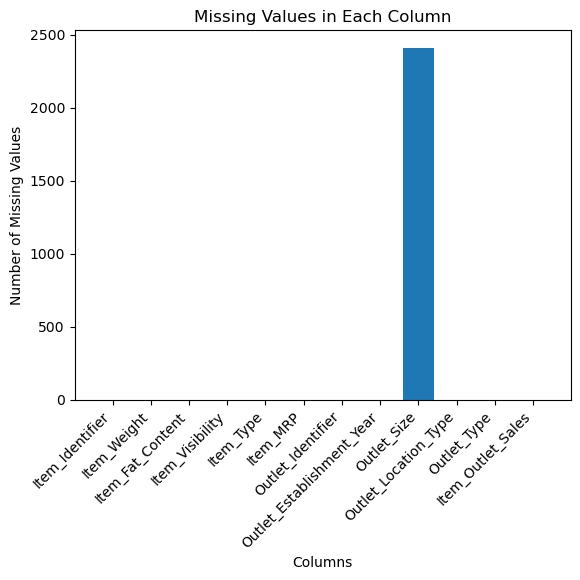

In [28]:
plt.bar(Missing_values1.index, Missing_values1.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.show()

# Item_fat_content

This column indicates the fat content of the item. It includes categories such as "Low Fat" or "Regular" to describe the fat content level in the product.

In [29]:
Item_fat_content_unique = train_df['Item_Fat_Content'].unique()
Item_fat_content_unique

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [30]:
column_name = 'Item_Fat_Content'
value_counts = train_df[column_name].value_counts()

In [31]:
value_counts

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

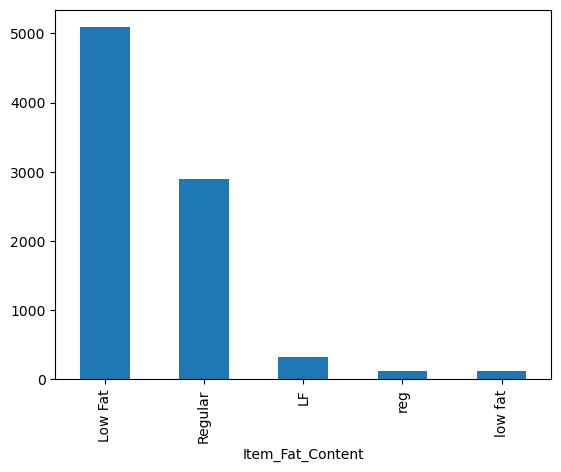

In [32]:
#bar plot for Item_Fat_Content to see which has less frequency
value_counts = train_df['Item_Fat_Content'].value_counts()
value_counts.plot(kind='bar')
plt.show()


In [33]:
# List of Item_Types for which you want to replace "Item_Fat_Content" with "Others"
item_types_to_replace = ['Health and Hygiene', 'Household', 'Others']

In [34]:
# Replace "Item_Fat_Content" with "Others" for specified "Item_Type" values
train_df.loc[train_df['Item_Type'].isin(item_types_to_replace), 'Item_Fat_Content'] = 'Others'


In [35]:
# Verify the changes
print(train_df[['Item_Type', 'Item_Fat_Content']].head(10))

               Item_Type Item_Fat_Content
0                  Dairy          Low Fat
1            Soft Drinks          Regular
2                   Meat          Low Fat
3  Fruits and Vegetables          Regular
4              Household           Others
5           Baking Goods          Regular
6            Snack Foods          Regular
7            Snack Foods          Low Fat
8           Frozen Foods          Regular
9           Frozen Foods          Regular


In [36]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('LF', 'Low Fat')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('reg', 'Regular')

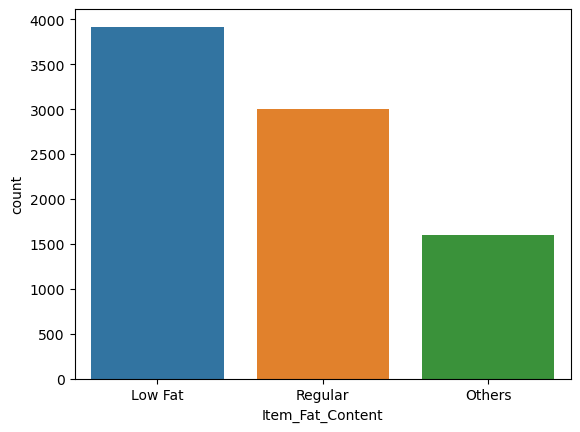

In [37]:
sns.countplot(x='Item_Fat_Content', data=train_df)
plt.show()

In [38]:
column_name = 'Item_Fat_Content'
value_counts = train_df[column_name].value_counts()

In [39]:
value_counts

Item_Fat_Content
Low Fat    3918
Regular    3006
Others     1599
Name: count, dtype: int64

# Item_Visibility

This column contains values representing the percentage of total display area in the store allocated to the particular item. It gives an idea of how prominently the item is placed on the shelves.

In [40]:
Item_Visibility_unique = train_df['Item_Visibility'].unique()
Item_Visibility_unique

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [41]:
column_name = 'Item_Visibility'
value_counts = train_df[column_name].value_counts()

In [42]:
print("Most occurring values in", column_name, ":\n", value_counts.head())

Most occurring values in Item_Visibility :
 Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: count, dtype: int64


In [43]:
print("Least occurring values in", column_name, ":\n", value_counts.tail())

Least occurring values in Item_Visibility :
 Item_Visibility
0.013957    1
0.110460    1
0.124646    1
0.054142    1
0.044878    1
Name: count, dtype: int64


In [44]:
visibility_range=([train_df['Item_Visibility'].min(),train_df['Item_Visibility'].max()])

In [45]:
visibility_range


[0.0, 0.328390948]

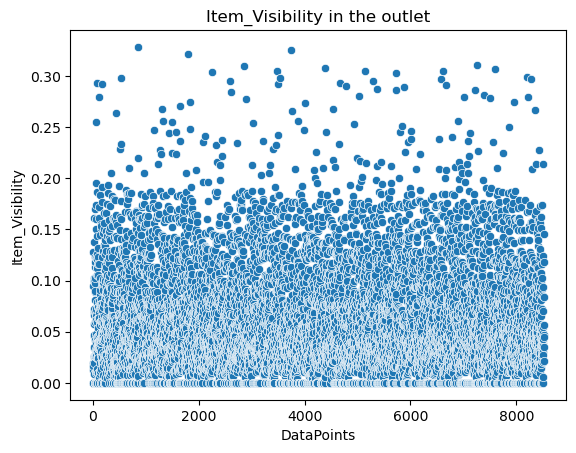

In [46]:
#scatter plot for Irem_visibility
sns.scatterplot(data=train_df, x=range(len(train_df['Item_Visibility'])), y='Item_Visibility')
plt.xlabel('DataPoints')
plt.ylabel('Item_Visibility')
plt.title('Item_Visibility in the outlet')
plt.show()

In [47]:
#pivot function

In [48]:
train_df.pivot_table(index='Item_Type',values='Item_Visibility')

Item_Visibility
Item_Type                             
Baking Goods                  0.069169
Breads                        0.066255
Breakfast                     0.085723
Canned                        0.068129
Dairy                         0.072427
Frozen Foods                  0.065645
Fruits and Vegetables         0.068513
Hard Drinks                   0.064943
Health and Hygiene            0.055216
Household                     0.061322
Meat                          0.062284
Others                        0.060241
Seafood                       0.074976
Snack Foods                   0.066850
Soft Drinks                   0.063972
Starchy Foods                 0.067564

# Item_Type

This column categorizes the type or category of the item. It could include values like "Dairy," "Frozen Foods," "Bakery," etc., classifying items into different groups

In [49]:
Item_Type_unique = train_df['Item_Type'].unique()
Item_Type_unique

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

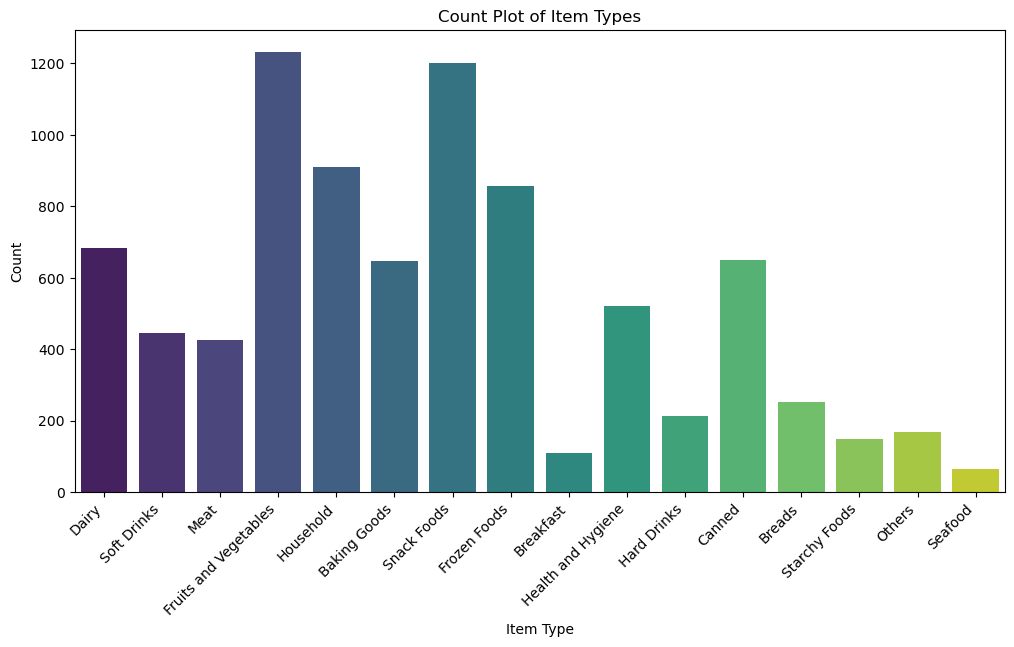

In [50]:
#countplot for Item_Types
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type',data=train_df, palette='viridis')  # You can change the palette as per your preference
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Count Plot of Item Types')
plt.show()

relationship between Item_Type and Item_Visibility

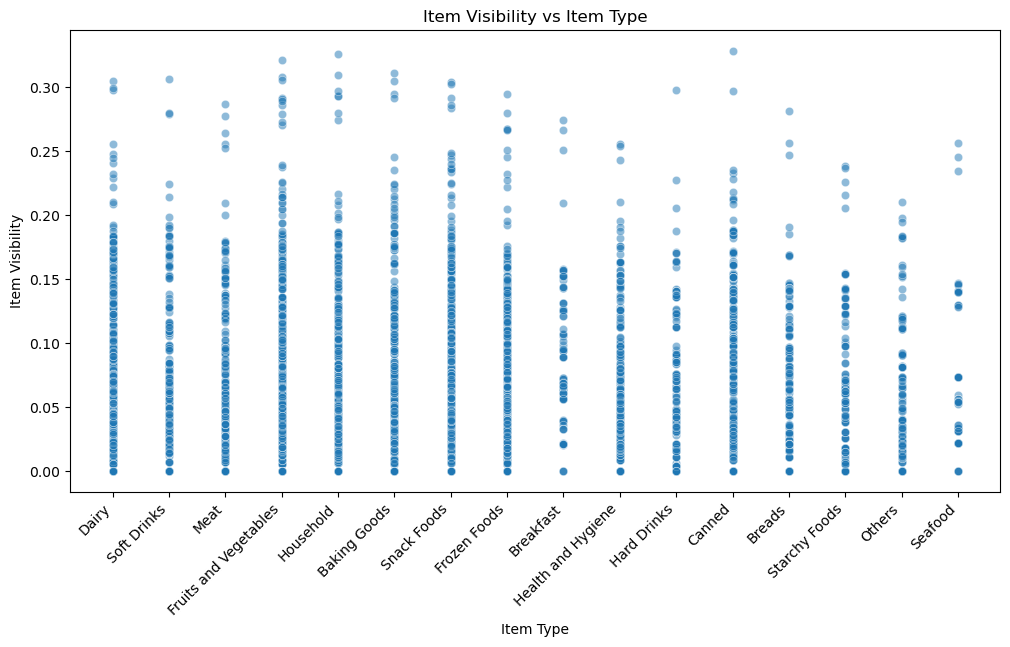

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_df, x='Item_Type', y='Item_Visibility', alpha=0.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Item Type')
plt.ylabel('Item Visibility')
plt.title('Item Visibility vs Item Type')
plt.show()

In [52]:
selected_columns = ['Item_Identifier', 'Item_Type', 'Item_Weight']
# Creating a new DataFrame with only the selected columns
selected_df = train_df[selected_columns]
# Dropping duplicates based on 'Item_Identifier' and 'Item_Type'
selected_df = selected_df.drop_duplicates(subset=['Item_Identifier', 'Item_Type'])
# Displaying the resulting DataFrame head and tail
print("Selected DataFrame:\n", selected_df.head(10))


Selected DataFrame:
   Item_Identifier              Item_Type  Item_Weight
0           FDA15                  Dairy      9.30000
1           DRC01            Soft Drinks      5.92000
2           FDN15                   Meat     17.50000
3           FDX07  Fruits and Vegetables     19.20000
4           NCD19              Household      8.93000
5           FDP36           Baking Goods     10.39500
6           FDO10            Snack Foods     13.65000
7           FDP10            Snack Foods     12.98788
8           FDH17           Frozen Foods     16.20000
9           FDU28           Frozen Foods     19.20000


In [53]:
print("Selected DataFrame:\n", selected_df.tail(10))


Selected DataFrame:
      Item_Identifier              Item_Type  Item_Weight
5690           FDB46            Snack Foods    10.500000
5717           NCX17     Health and Hygiene    21.250000
5850           FDH31                   Meat    12.000000
5932           FDX13                 Canned     7.725000
6094           NCU53     Health and Hygiene     5.485000
6440           FDD28           Frozen Foods    10.695000
6526           FDU43  Fruits and Vegetables    13.224769
6892           NCF55              Household     6.675000
7039           NCW30              Household     5.210000
7298           NCW05     Health and Hygiene    20.250000


In [54]:
#pivot function

In [55]:
train_df.pivot_table(index='Item_Type',values='Item_Outlet_Sales')

Item_Outlet_Sales
Item_Type                               
Baking Goods                 1952.971207
Breads                       2204.132226
Breakfast                    2111.808651
Canned                       2225.194904
Dairy                        2232.542597
Frozen Foods                 2132.867744
Fruits and Vegetables        2289.009592
Hard Drinks                  2139.221622
Health and Hygiene           2010.000265
Household                    2258.784300
Meat                         2158.977911
Others                       1926.139702
Seafood                      2326.065928
Snack Foods                  2277.321739
Soft Drinks                  2006.511735
Starchy Foods                2374.332773

relation ship between Item_Type and Item_Outlet_Sales

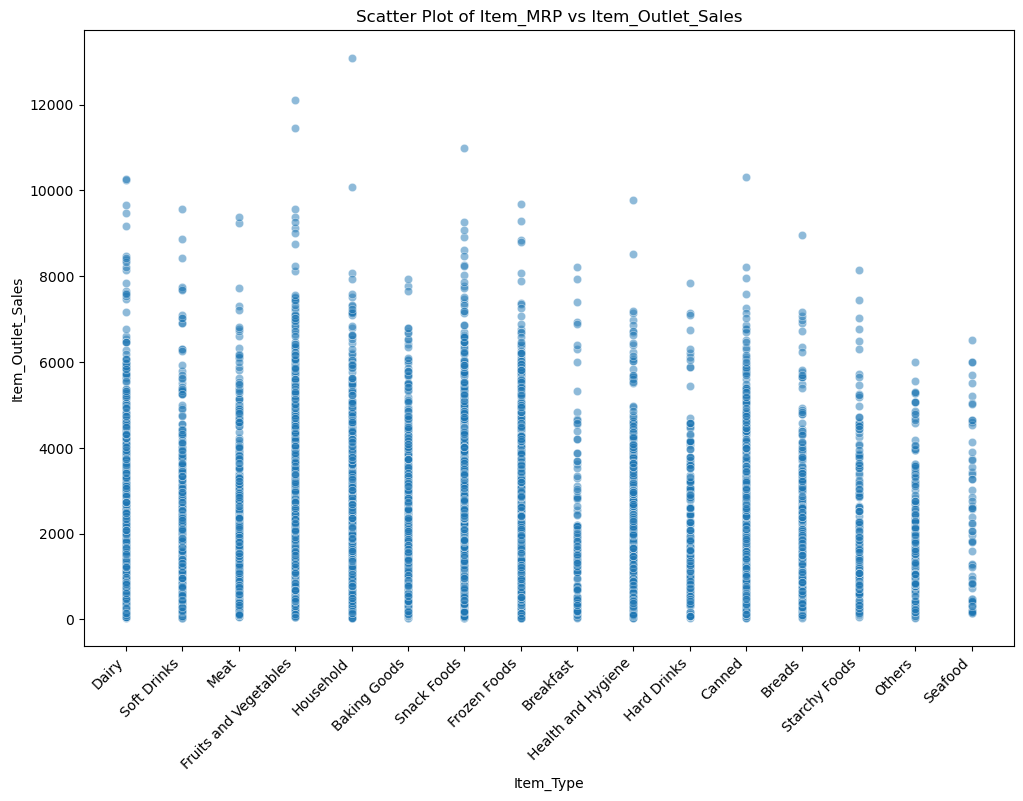

In [56]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df, alpha=0.5)
plt.title('Scatter Plot of Item_MRP vs Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Item_MRP

This column is the Maximum Retail Price (MRP) of the item. MRP is the maximum price at which the product can be sold to the customer.

In [57]:
Item_MRP_unique = train_df['Item_MRP'].unique()
Item_MRP_unique

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

In [58]:
column_name = 'Item_MRP'
value_counts = train_df[column_name].value_counts()

In [59]:
print("Items with High MRP", column_name, ":\n", value_counts.head(15))

Items with High MRP Item_MRP :
 Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
109.5228    6
196.5768    6
108.6912    5
143.2154    5
152.8366    5
48.8376     5
113.2834    5
120.8756    5
121.3098    5
110.1544    5
Name: count, dtype: int64


In [60]:
print("items with low MRP", column_name, ":\n", value_counts.tail(10))

items with low MRP Item_MRP :
 Item_MRP
42.5770     1
125.7704    1
120.5072    1
39.6164     1
148.8076    1
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, dtype: int64


In [61]:
#pivot function

In [62]:
train_df.pivot_table(index='Item_Type',values='Item_MRP')

Item_MRP
Item_Type                        
Baking Goods           126.380766
Breads                 140.952669
Breakfast              141.788151
Canned                 139.763832
Dairy                  148.499208
Frozen Foods           138.503366
Fruits and Vegetables  144.581235
Hard Drinks            137.077928
Health and Hygiene     130.818921
Household              149.424753
Meat                   139.882032
Others                 132.851430
Seafood                141.841719
Snack Foods            146.194934
Soft Drinks            131.492506
Starchy Foods          147.838023

relation ship between Item_Type and Item_MRP

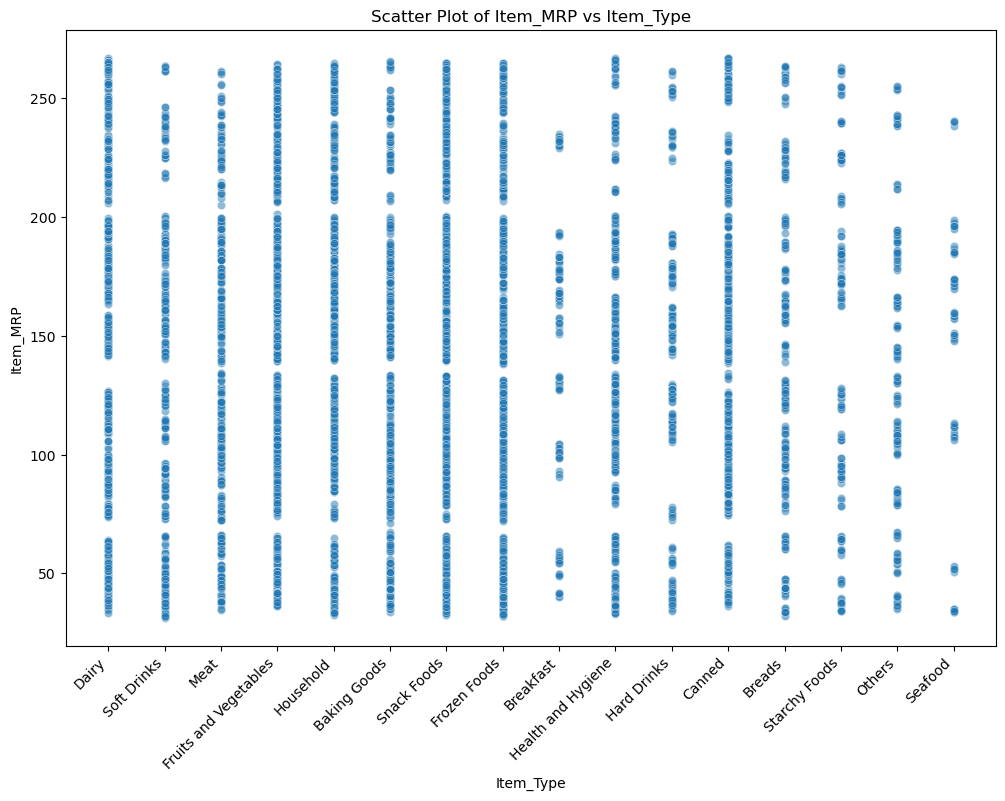

In [63]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_Type', y='Item_MRP', data=train_df, alpha=0.5)
plt.title('Scatter Plot of Item_MRP vs Item_Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

relation ship between Item_MRP  and Item_Identifier

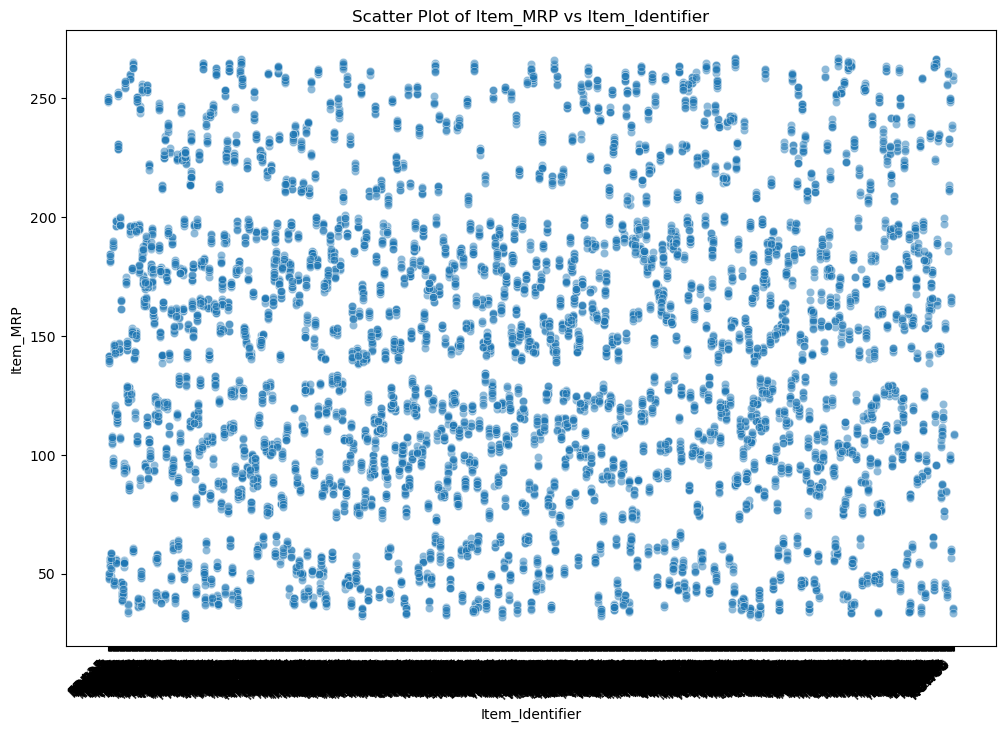

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_Identifier', y='Item_MRP', data=train_df, alpha=0.5)
plt.title('Scatter Plot of Item_MRP vs Item_Identifier')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# outlet_identifier

This column contains unique identifiers or codes for each retail outlet or store where the items are sold. Each store would have a distinct identifier.

In [65]:
Outlet_identifier_unique = train_df['Outlet_Identifier'].unique()
Outlet_identifier_unique

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

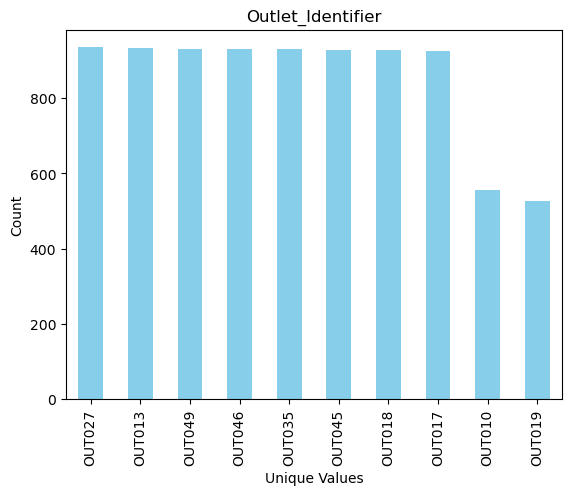

In [66]:
train_df['Outlet_Identifier'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Outlet_Identifier')
plt.show()

# Outlet_Establishment_Year

 This column indicates the year in which each outlet or store was established. It provides information about the age of the store.

In [67]:
Outlet_Establishment_year_unique = train_df['Outlet_Establishment_Year'].unique()
Outlet_Establishment_year_unique

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

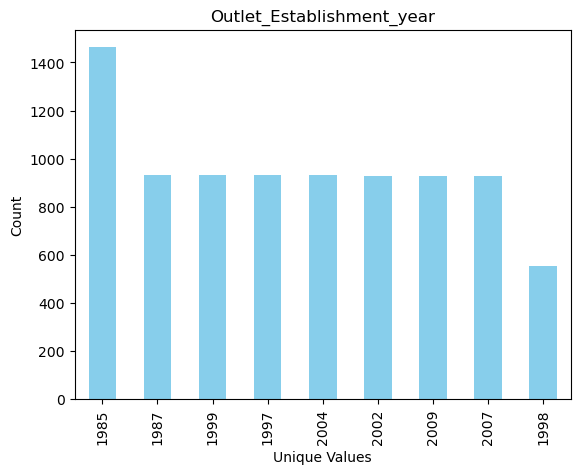

In [68]:
train_df['Outlet_Establishment_Year'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Outlet_Establishment_year')
plt.show()

# Item_outlet_sales

 This column contains the sales figures for each item in terms of revenue. It provides information about the monetary value of sales for each product in each store.

In [69]:
Outlet_Sales_unique = train_df['Item_Outlet_Sales'].unique()
Outlet_Sales_unique

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [70]:
#scatter plot for item_outlet_sales,item_type and outlet_identifier

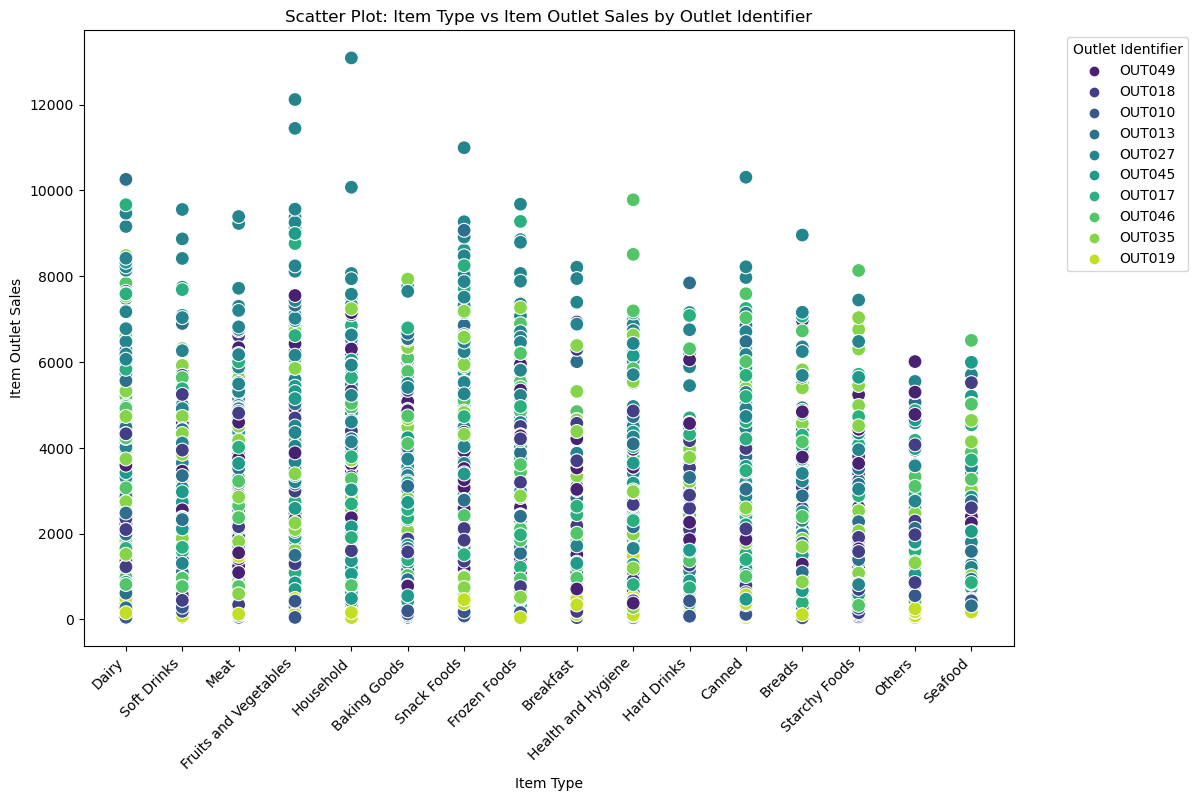

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Identifier', data=train_df, palette='viridis', s=100)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item Type vs Item Outlet Sales by Outlet Identifier')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability if needed
plt.legend(title='Outlet Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Outlet_type

This column classifies the type of outlet or store. It might include values like "Supermarket Type1," "Supermarket Type2," "Grocery Store," etc., describing the format of the retail outlet.

In [72]:
Outlet_type_unique = train_df['Outlet_Type'].unique()
Outlet_type_unique

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

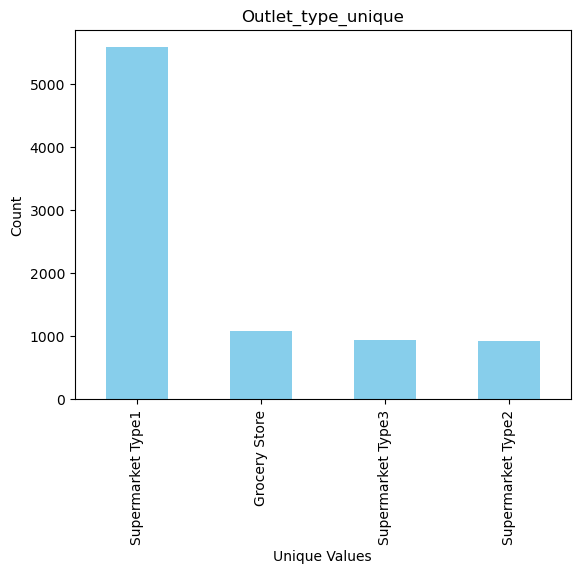

In [73]:
#bar chart to show the outlet_location_type
train_df['Outlet_Type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Outlet_type_unique')
plt.show()

In [74]:
train_df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

Item_Outlet_Sales
Outlet_Type                         
Grocery Store             339.828500
Supermarket Type1        2316.181148
Supermarket Type2        1995.498739
Supermarket Type3        3694.038558

In [75]:
train_df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [76]:
#368000(g),3453000(s3),12900000(s1),1850000(s2)(group by method)

In [77]:
#relation between outlet_type and item_outlet_sales

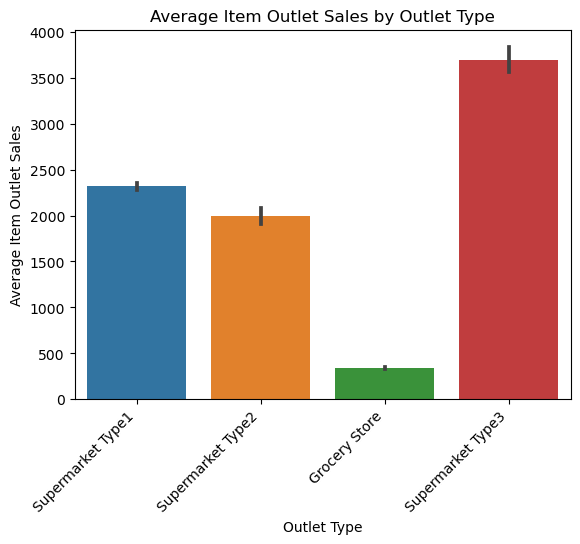

In [78]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_df)
# Customize the plot
plt.xlabel('Outlet Type')
plt.ylabel('Average Item Outlet Sales')
plt.title('Average Item Outlet Sales by Outlet Type')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

# outlet_location_type

This column categorizes the location of each store. It has values like "Tier 1," "Tier 2," or "Tier 3," indicating the tier or category of the location.

In [79]:
Outlet_location_type_unique = train_df['Outlet_Location_Type'].unique()
Outlet_location_type_unique

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

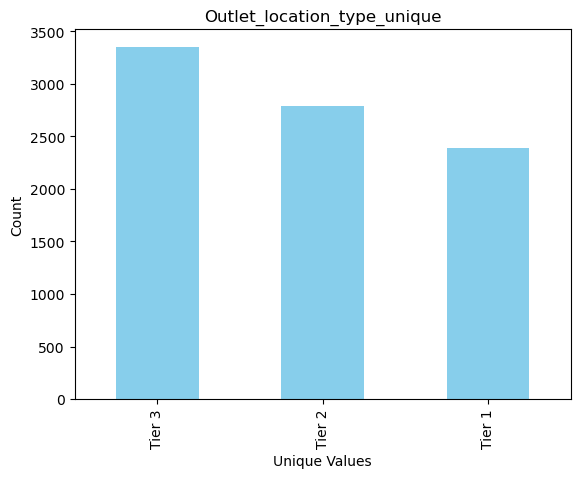

In [80]:
#bar chart to show the outlet_location_type
train_df['Outlet_Location_Type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Outlet_location_type_unique')
plt.show()

 Outlet Type in Tier1

In [81]:
# Select rows in Tier 1
tier_1_outlets = train_df[train_df['Outlet_Location_Type'] == 'Tier 1']
# Get unique 'Outlet_Type' values in Tier 1
unique_outlet_types_in_tier_1 = tier_1_outlets['Outlet_Type'].unique()
# Display the unique 'Outlet_Type' values in Tier 1
print("Unique Outlet Types in Tier 1:")
print(unique_outlet_types_in_tier_1)

Unique Outlet Types in Tier 1:
['Supermarket Type1' 'Grocery Store']


Outlet Type in Tier2

In [82]:
tier_2_outlets = train_df[train_df['Outlet_Location_Type'] == 'Tier 2']

# Get unique outlet types in Tier 2
unique_outlet_types_tier_2 = tier_2_outlets['Outlet_Type'].unique()

# Display the unique outlet types in Tier 2
print("Unique Outlet Types in Tier 2:")
print(unique_outlet_types_tier_2)

Unique Outlet Types in Tier 2:
['Supermarket Type1']


Outlet Type in Tier3

In [83]:
tier_3_outlets = train_df[train_df['Outlet_Location_Type'] == 'Tier 3']

# Get unique outlet types in Tier 2
unique_outlet_types_tier_3 = tier_3_outlets['Outlet_Type'].unique()

# Display the unique outlet types in Tier 2
print("Unique Outlet Types in Tier 3:")
print(unique_outlet_types_tier_3)

Unique Outlet Types in Tier 3:
['Supermarket Type2' 'Grocery Store' 'Supermarket Type1'
 'Supermarket Type3']


# outlet_Size

This column represents the size of each store. It have values like "Small," "Medium," or "High," describing the physical size of the retail outlet.

In [84]:
Outlet_Size_unique = train_df['Outlet_Size'].unique()
Outlet_Size_unique

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [85]:
has_null_values = train_df['Outlet_Size'].isnull().sum()
has_null_values

2410

In [86]:
#filling null values in outlet_size

In [87]:
outlets_with_null_size = train_df[train_df['Outlet_Size'].isnull()]
null_size_outlet_names = outlets_with_null_size['Outlet_Identifier'].unique()
print("Outlets with Null Outlet_Size:")
print(null_size_outlet_names)

Outlets with Null Outlet_Size:
['OUT010' 'OUT045' 'OUT017']


OUT010

In [88]:
#in which location_type and in which outlet_type is present

In [89]:
outlet010_rows = train_df[train_df['Outlet_Identifier'] == 'OUT010']

outlet_location_type_values = outlet010_rows['Outlet_Location_Type'].unique()
outlet_type_values = outlet010_rows['Outlet_Type'].unique()

print("Outlet_Location_Type values for OUT010:", outlet_location_type_values)
print("Outlet_Type values for OUT010:", outlet_type_values)


Outlet_Location_Type values for OUT010: ['Tier 3']
Outlet_Type values for OUT010: ['Grocery Store']


In [90]:
#finding NaN values in "OUT010"
OUT010_fill= train_df[train_df['Outlet_Identifier'] == 'OUT010']
OUT010_fill.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3             FDX07       19.200          Regular         0.000000   
28            FDE51        5.925          Regular         0.161467   
30            FDV38       19.250          Low Fat         0.170349   
45            FDM39        6.420          Low Fat         0.089499   
65            FDC46       17.700          Low Fat         0.195068   
90            FDW20       20.750          Low Fat         0.040421   
122           FDB14       20.250          Regular         0.171939   
133           FDS52        8.890          Low Fat         0.009163   
139           NCN07       18.500           Others         0.056816   
174           FDI32       17.700          Low Fat         0.291865   

                 Item_Type  Item_MRP Outlet_Identifier  \
3    Fruits and Vegetables  182.0950            OUT010   
28                   Dairy   45.5086            OUT010   
30                   Dairy   55.7956            OUT010   
45                   Dairy  178.1002            OUT010   
65             Snack Foods  185.4266            OUT010   
90   Fruits and Vegetables  122.1730            OUT010   
122                 Canned   92.5120            OUT010   
133           Frozen Foods  101.7016            OUT010   
139                 Others  132.1284            OUT010   
174  Fruits and Vegetables  115.1834            OUT010   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                         1998         NaN               Tier 3   
28                        1998         NaN               Tier 3   
30                        1998         NaN               Tier 3   
45                        1998         NaN               Tier 3   
65                        1998         NaN               Tier 3   
90                        1998         NaN               Tier 3   
122                       1998         NaN               Tier 3   
133                       1998         NaN               Tier 3   
139                       1998         NaN               Tier 3   
174                       1998         NaN               Tier 3   

       Outlet_Type  Item_Outlet_Sales  
3    Grocery Store           732.3800  
28   Grocery Store           178.4344  
30   Grocery Store           163.7868  
45   Grocery Store           358.2004  
65   Grocery Store           184.4266  
90   Grocery Store           369.5190  
122  Grocery Store           186.4240  
133  Grocery Store           101.2016  
139  Grocery Store           263.6568  
174  Grocery Store           345.5502

In [91]:
num_values = len(OUT010_fill)
num_values

555

OUT045

In [92]:
#in which location_type and in which outlet_type is present

In [93]:
outlet045_rows = train_df[train_df['Outlet_Identifier'] == 'OUT045']

outlet_location_type_values = outlet045_rows['Outlet_Location_Type'].unique()
outlet_type_values = outlet010_rows['Outlet_Type'].unique()

print("Outlet_Location_Type values for OUT045:", outlet_location_type_values)
print("Outlet_Type values for OUT045:", outlet_type_values)


Outlet_Location_Type values for OUT045: ['Tier 2']
Outlet_Type values for OUT045: ['Grocery Store']


In [94]:
#finding NaN values in "OUT045"
OUT045_fill= train_df[train_df['Outlet_Identifier'] == 'OUT045']
OUT045_fill.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8            FDH17       16.200          Regular         0.016687   
33           FDO23       17.850          Low Fat         0.000000   
46           NCP05       19.600           Others         0.000000   
47           FDV49       10.000          Low Fat         0.025880   
56           NCX54        9.195           Others         0.048157   

             Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
8         Frozen Foods   96.9726            OUT045                       2002   
33              Breads   93.1436            OUT045                       2002   
46  Health and Hygiene  153.3024            OUT045                       2002   
47              Canned  265.2226            OUT045                       2002   
56           Household  106.1622            OUT045                       2002   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
8          NaN               Tier 2  Supermarket Type1          1076.5986  
33         NaN               Tier 2  Supermarket Type1          2174.5028  
46         NaN               Tier 2  Supermarket Type1          2428.8384  
47         NaN               Tier 2  Supermarket Type1          5815.0972  
56         NaN               Tier 2  Supermarket Type1          2117.2440

In [95]:
num_values = len(OUT045_fill)
num_values

929

 OUT017

In [96]:
#in which location_type and in which outlet_type is present

In [97]:
outlet017_rows = train_df[train_df['Outlet_Identifier'] == 'OUT017']

outlet_location_type_values = outlet010_rows['Outlet_Location_Type'].unique()
outlet_type_values = outlet010_rows['Outlet_Type'].unique()

print("Outlet_Location_Type values for OUT017:", outlet_location_type_values)
print("Outlet_Type values for OUT017:", outlet_type_values)


Outlet_Location_Type values for OUT017: ['Tier 3']
Outlet_Type values for OUT017: ['Grocery Store']


In [98]:
#finding NaN values in "OUT017"
OUT017_fill= train_df[train_df['Outlet_Identifier'] == 'OUT017']
OUT017_fill.head(10)


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
9             FDU28       19.200          Regular         0.094450   
25            NCD06       13.000           Others         0.099887   
53            FDA43       10.895          Low Fat         0.065042   
54            NCP18       12.150           Others         0.028760   
73            FDG02        7.855          Low Fat         0.011325   
78            FDL04       19.000          Low Fat         0.112557   
85            FDG20       15.500          Regular         0.126399   
111           FDS52        8.890          Low Fat         0.005505   
116           FDZ16       16.850          Regular         0.160760   
118           DRA12       11.600          Low Fat         0.041178   

                 Item_Type  Item_MRP Outlet_Identifier  \
9             Frozen Foods  187.8214            OUT017   
25               Household   45.9060            OUT017   
53   Fruits and Vegetables  196.3794            OUT017   
54               Household  151.4708            OUT017   
73                  Canned  189.6188            OUT017   
78            Frozen Foods  104.9622            OUT017   
85   Fruits and Vegetables  177.0028            OUT017   
111           Frozen Foods  102.4016            OUT017   
116           Frozen Foods  192.4478            OUT017   
118            Soft Drinks  140.3154            OUT017   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
9                         2007         NaN               Tier 2   
25                        2007         NaN               Tier 2   
53                        2007         NaN               Tier 2   
54                        2007         NaN               Tier 2   
73                        2007         NaN               Tier 2   
78                        2007         NaN               Tier 2   
85                        2007         NaN               Tier 2   
111                       2007         NaN               Tier 2   
116                       2007         NaN               Tier 2   
118                       2007         NaN               Tier 2   

           Outlet_Type  Item_Outlet_Sales  
9    Supermarket Type1          4710.5350  
25   Supermarket Type1           838.9080  
53   Supermarket Type1          3121.2704  
54   Supermarket Type1          4815.0656  
73   Supermarket Type1          2285.0256  
78   Supermarket Type1          1587.9330  
85   Supermarket Type1          2479.4392  
111  Supermarket Type1          2732.4432  
116  Supermarket Type1          4843.6950  
118  Supermarket Type1          2552.6772

In [99]:
num_values = len(OUT017_fill)
num_values

926

Filling the null values

Here we can see OUT010 is Tier 3, Grocery Store and OUT045, OUT017 are Tier2, so we are using mode of outlet size of each tier to fill na vales

In [100]:
OType_Grocery=train_df[train_df['Outlet_Type']=='Grocery Store']
mode_OType_Grocery=OType_Grocery['Outlet_Size'].mode()[0]
mode_OType_Grocery

'Small'

In [101]:
OType_Sp=train_df[train_df['Outlet_Type']=='Supermarket Type1']
mode_OType_sp=OType_Sp['Outlet_Size'].mode()[0]
mode_OType_sp

'Small'

In [102]:
for i in range(0,8523):
        if train_df['Outlet_Type'][i]=='Grocery Store':
            if train_df['Outlet_Size'].isna()[i]==True:
                train_df['Outlet_Size'].iloc[i]=mode_OType_Grocery

In [103]:
for i in range(0,8523):
        if train_df['Outlet_Type'][i]=='Supermarket Type1':
            if train_df['Outlet_Size'].isna()[i]==True:
                train_df['Outlet_Size'].iloc[i]=mode_OType_sp

In [104]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [105]:
has_null_values = train_df['Outlet_Size'].isnull().sum()
has_null_values

0

# finding outliers

# numerical columns

In [106]:
#finding outliers for numerical columns using box plot
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
print("the numerical columns are:",numerical_columns)

the numerical columns are: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [107]:
#using boxplot to find out outliers in the numerical columns

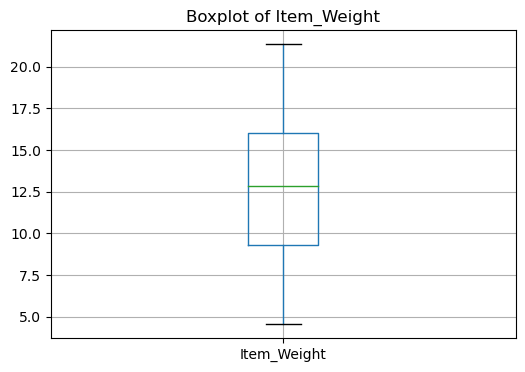

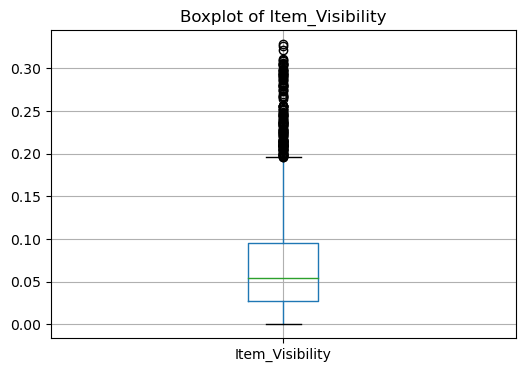

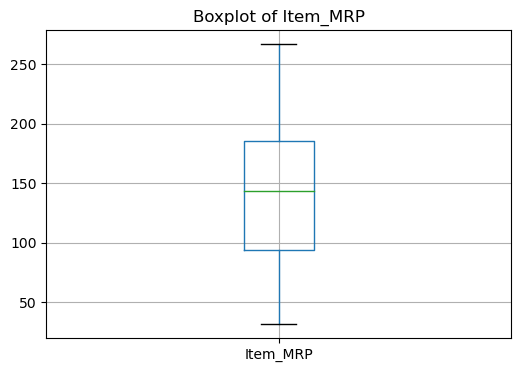

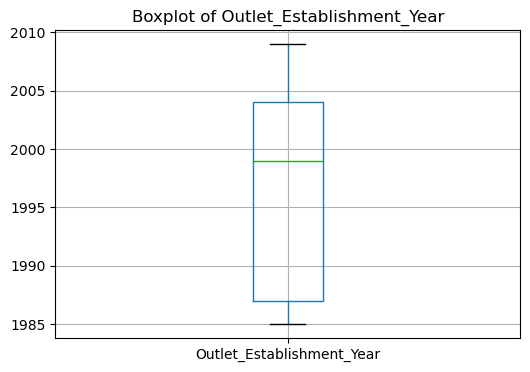

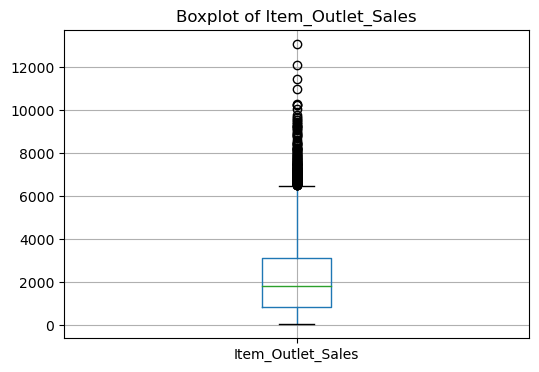

In [108]:
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    train_df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [109]:
#from scipy import stats
#for column in numerical_columns:
    # Calculate Z-scores
    #z_scores = stats.zscore(train_df[column])

    # Identify outliers based on Z-scores
    #outliers = train_df[(z_scores > 3) | (z_scores < -3)]

    #print(f"Outliers in '{column}': {outliers.shape[0]}")

Z-scores are based on the mean and standard deviation, while the IQR method is based on quartiles.

Outliers in Item_Visibility

In [110]:
#outlets count in Item_visibility
column_name = 'Item_Visibility'
Q1 = train_df[column_name].quantile(0.25)
Q3 = train_df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = ((train_df[column_name] < lower_bound) | (train_df[column_name] > upper_bound)).sum()
# Display the count of outliers
print("Number of outliers in", column_name, ":", outliers_count)

Number of outliers in Item_Visibility : 144


Removing Outliers in the Item_Visibility using "CLIP Method"

In [111]:
#Finding the limits

In [112]:
Upper_limit=train_df["Item_Visibility"].mean()+3*train_df["Item_Visibility"].std()
Lower_limit=train_df["Item_Visibility"].mean()-3*train_df["Item_Visibility"].std()

In [113]:
Upper_limit

0.22092549574235668

In [114]:
Lower_limit

-0.08866143818445452

In [115]:
#finding the outliers
train_df.loc[(train_df["Item_Visibility"]>=Upper_limit)|(train_df["Item_Visibility"]<=Lower_limit)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02    13.426069          Regular         0.255395   
83             NCL18    13.384736           Others         0.293418   
108            DRE60    11.847460          Low Fat         0.278974   
174            FDI32    17.700000          Low Fat         0.291865   
434            FDW27    12.817344          Regular         0.264125   
...              ...          ...              ...              ...   
8194           FDY15    13.426069          Regular         0.299098   
8215           FDZ16    12.867061          Regular         0.279887   
8273           FDD14    12.305705          Low Fat         0.297313   
8345           FDY28    12.867061          Regular         0.266397   
8432           FDI16    14.000000          Regular         0.227261   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   
83                Household  194.6136            OUT019   
108             Soft Drinks  225.3720            OUT019   
174   Fruits and Vegetables  115.1834            OUT010   
434                    Meat  155.7314            OUT019   
...                     ...       ...               ...   
8194                  Dairy  157.8630            OUT019   
8215           Frozen Foods  193.1478            OUT019   
8273                 Canned  185.4266            OUT019   
8345           Frozen Foods  215.6218            OUT019   
8432           Frozen Foods   54.3640            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
49                         1985       Small               Tier 1   
83                         1985       Small               Tier 1   
108                        1985       Small               Tier 1   
174                        1998       Small               Tier 3   
434                        1985       Small               Tier 1   
...                         ...         ...                  ...   
8194                       1985       Small               Tier 1   
8215                       1985       Small               Tier 1   
8273                       1985       Small               Tier 1   
8345                       1985       Small               Tier 1   
8432                       1998       Small               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
49    Grocery Store           780.3176  
83    Grocery Store           583.2408  
108   Grocery Store           679.1160  
174   Grocery Store           345.5502  
434   Grocery Store           155.1314  
...             ...                ...  
8194  Grocery Store           469.3890  
8215  Grocery Store           387.4956  
8273  Grocery Store           368.8532  
8345  Grocery Store           641.1654  
8432  Grocery Store           159.7920  

[95 rows x 12 columns]

CLIP Method-change the outlier to upper or lower limit values

In [116]:
trainA = train_df.copy()
trainA["Item_Visibility"] = trainA["Item_Visibility"].clip(lower=Lower_limit, upper=Upper_limit)


Text(0.5, 1.0, 'Boxplot Before Clipping Outliers')

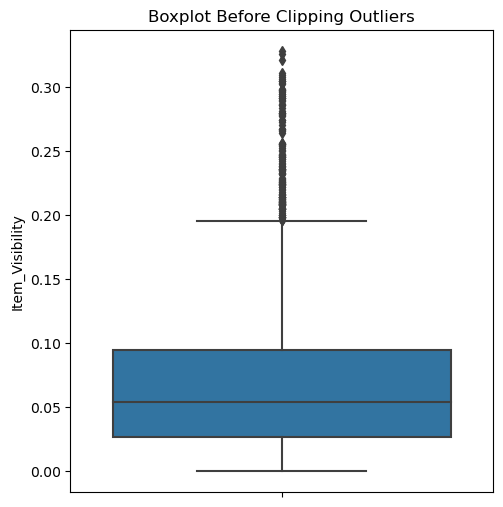

In [117]:
# Plot boxplots before and after clipping
plt.figure(figsize=(12, 6))

# Boxplot before clipping
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df["Item_Visibility"])
plt.title("Boxplot Before Clipping Outliers")

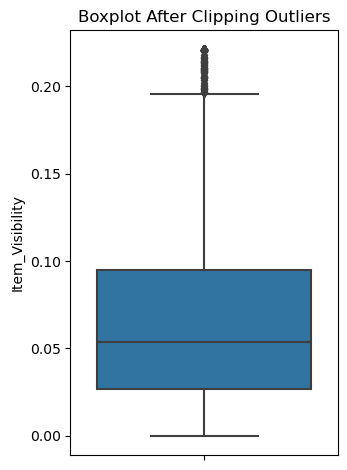

In [118]:
# Boxplot after clipping
plt.subplot(1, 2, 2)
sns.boxplot(y=trainA["Item_Visibility"])
plt.title("Boxplot After Clipping Outliers")

# Display the plots
plt.tight_layout()
plt.show()

Outliers in  Item_Outlet_Sales

In [119]:
#outlets count in Item_Outlet_Sales
column_name = 'Item_Outlet_Sales'
Q1 = train_df[column_name].quantile(0.25)
Q3 = train_df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = ((train_df[column_name] < lower_bound) | (train_df[column_name] > upper_bound)).sum()
# Display the count of outliers
print("Number of outliers in", column_name, ":", outliers_count)

Number of outliers in Item_Outlet_Sales : 186


In [120]:
#Finding Upper and lower_limits

In [121]:
Upper_limit=train_df["Item_Outlet_Sales"].mean()+3*train_df["Item_Outlet_Sales"].std()
Lower_limit=train_df["Item_Outlet_Sales"].mean()-3*train_df["Item_Outlet_Sales"].std()

In [122]:
Upper_limit

7300.787760776528

In [123]:
Lower_limit

-2938.2099336264637

In [124]:
#finding outliers
train_df.loc[(train_df["Item_Outlet_Sales"]>=Upper_limit)|(train_df["Item_Outlet_Sales"]<=Lower_limit)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
130            FDY25    12.305705          Low Fat         0.033810   
145            FDP16    18.600000          Low Fat         0.039356   
276            FDY55    16.750000          Low Fat         0.081253   
304            DRE60     9.395000          Low Fat         0.159658   
333            FDN58    12.987880          Regular         0.056597   
...              ...          ...              ...              ...   
7930           FDP15    12.817344          Low Fat         0.083536   
8039           FDY55    16.750000          Low Fat         0.081485   
8201           FDO03    12.817344          Regular         0.036704   
8245           FDU55    16.200000          Low Fat         0.035967   
8447           FDS26    20.350000          Low Fat         0.089975   

                  Item_Type  Item_MRP Outlet_Identifier  \
130                  Canned  180.5976            OUT027   
145            Frozen Foods  246.3802            OUT049   
276   Fruits and Vegetables  256.4988            OUT013   
304             Soft Drinks  224.9720            OUT045   
333             Snack Foods  230.9984            OUT027   
...                     ...       ...               ...   
7930                   Meat  255.4330            OUT027   
8039  Fruits and Vegetables  258.0988            OUT045   
8201                   Meat  228.1352            OUT027   
8245  Fruits and Vegetables  260.3278            OUT049   
8447                  Dairy  261.6594            OUT017   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
130                        1985      Medium               Tier 3   
145                        1999      Medium               Tier 1   
276                        1987        High               Tier 3   
304                        2002       Small               Tier 2   
333                        1985      Medium               Tier 3   
...                         ...         ...                  ...   
7930                       1985      Medium               Tier 3   
8039                       2002       Small               Tier 2   
8201                       1985      Medium               Tier 3   
8245                       1999      Medium               Tier 1   
8447                       2007       Small               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
130   Supermarket Type3          7968.2944  
145   Supermarket Type1          7370.4060  
276   Supermarket Type1          7452.9652  
304   Supermarket Type1          7696.6480  
333   Supermarket Type3          9267.9360  
...                 ...                ...  
7930  Supermarket Type3          9227.9880  
8039  Supermarket Type1          8994.9580  
8201  Supermarket Type3          9390.4432  
8245  Supermarket Type1          7549.5062  
8447  Supermarket Type1          7588.1226  

[90 rows x 12 columns]

CLIP Method-change the outlier to upper or lower limit values

In [125]:
trainB = train_df.copy()
trainB["Item_Outlet_Sales"] = trainB["Item_Outlet_Sales"].clip(lower=Lower_limit, upper=Upper_limit)


Text(0.5, 1.0, 'Boxplot Before Clipping Outliers')

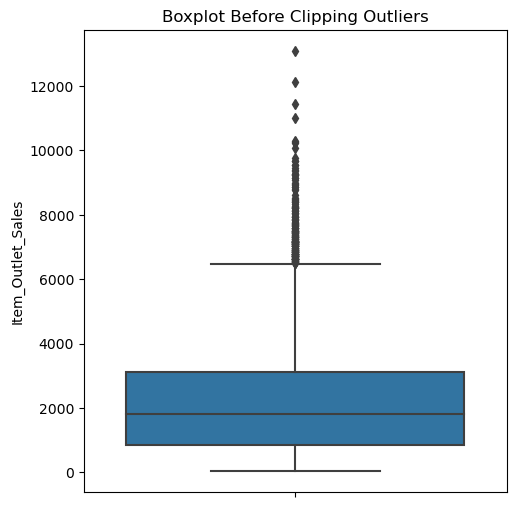

In [126]:
# Plot boxplots before and after clipping
plt.figure(figsize=(12, 6))
# Boxplot before clipping
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df["Item_Outlet_Sales"])
plt.title("Boxplot Before Clipping Outliers")


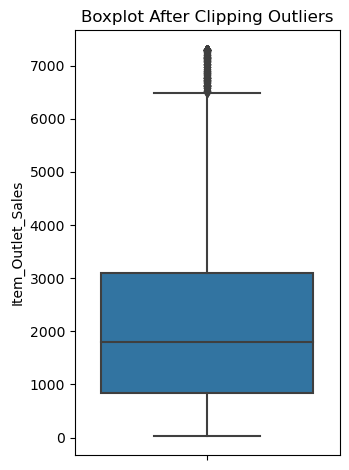

In [127]:
plt.subplot(1, 2, 2)
sns.boxplot(y=trainB["Item_Outlet_Sales"])
plt.title("Boxplot After Clipping Outliers")
# Display the plots
plt.tight_layout()
plt.show()

# categorical columns

In [128]:
#finding outliers in categorical data
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

In [129]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

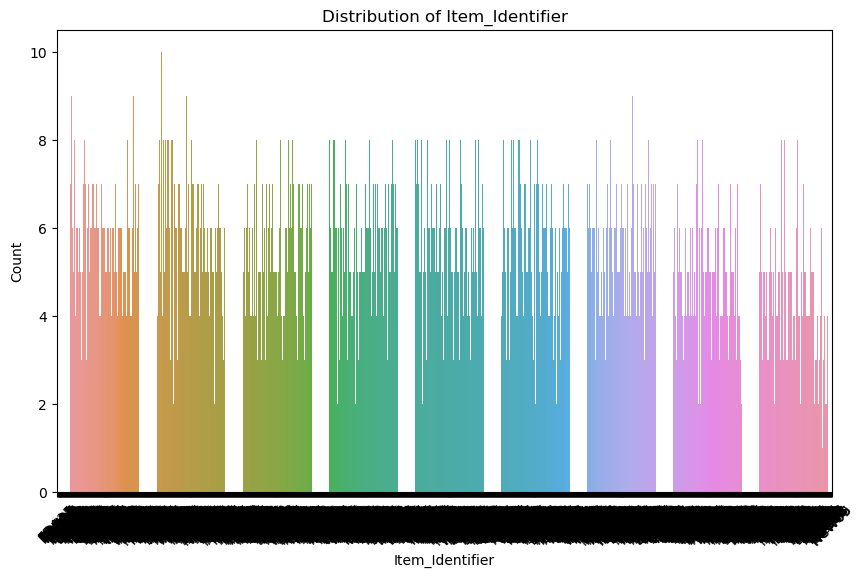

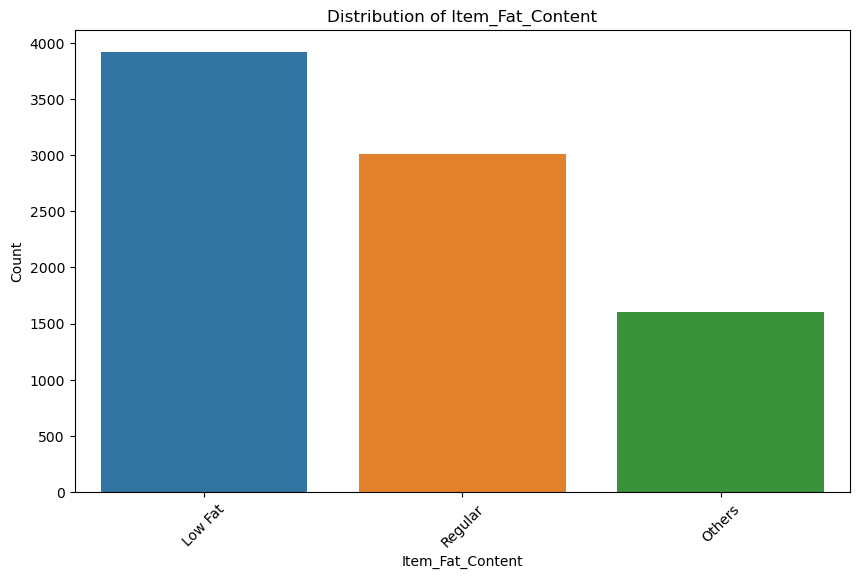

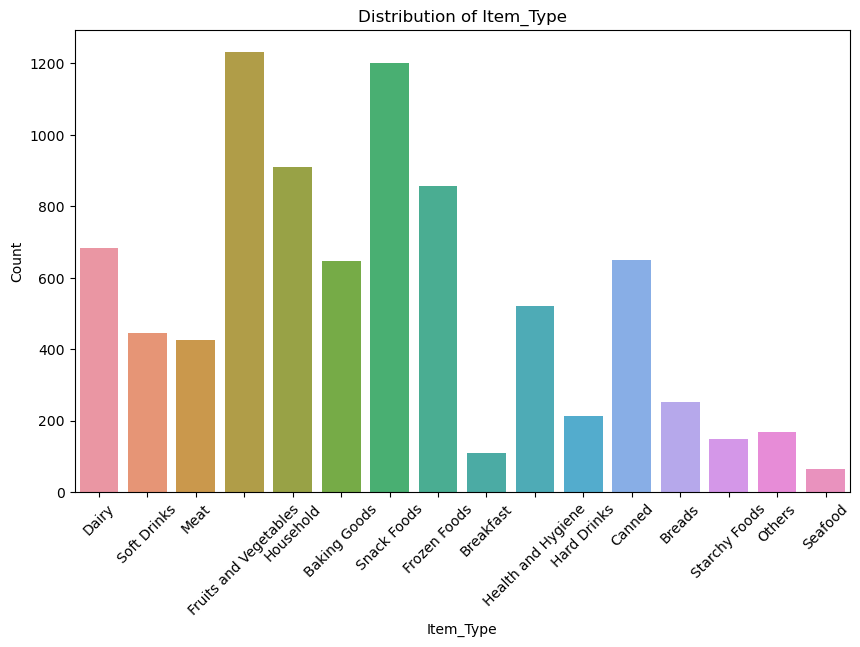

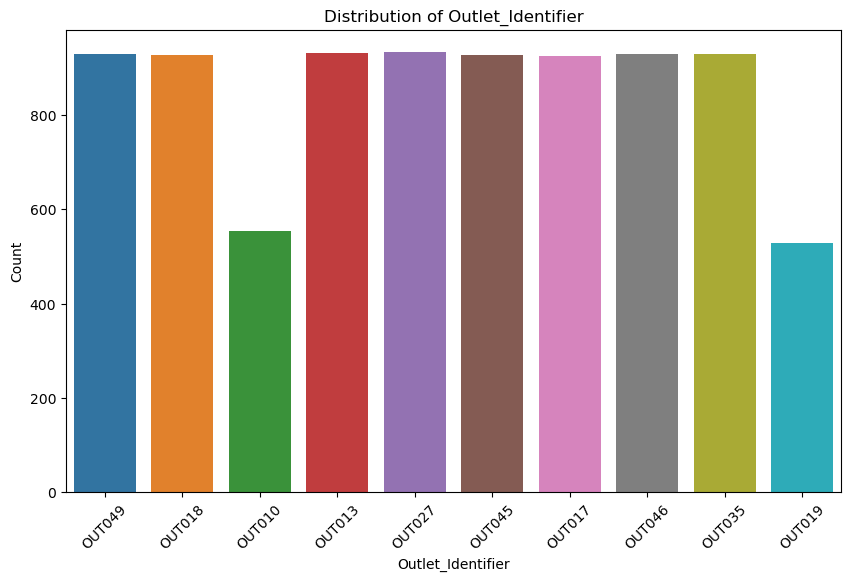

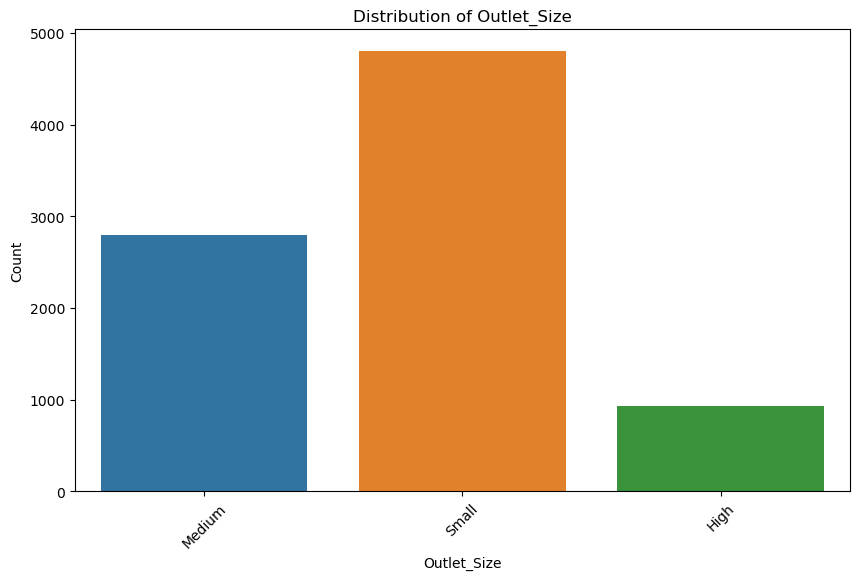

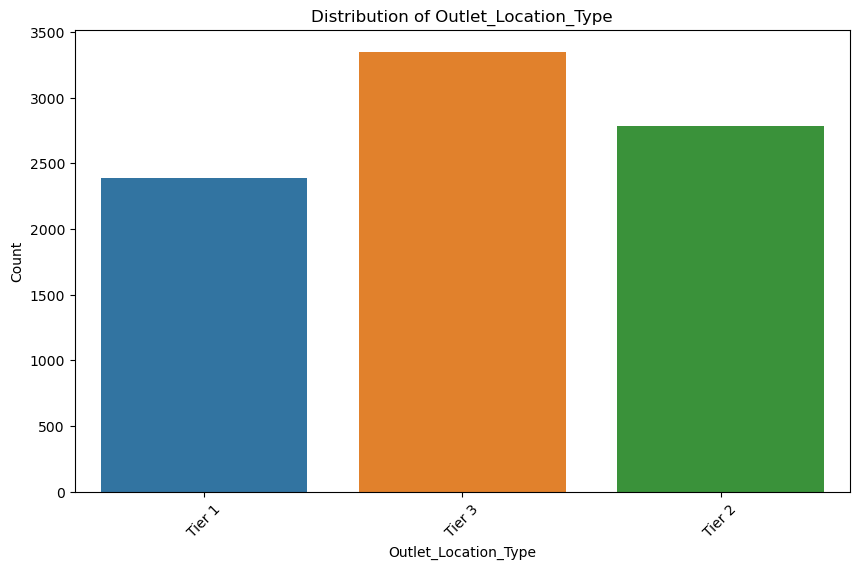

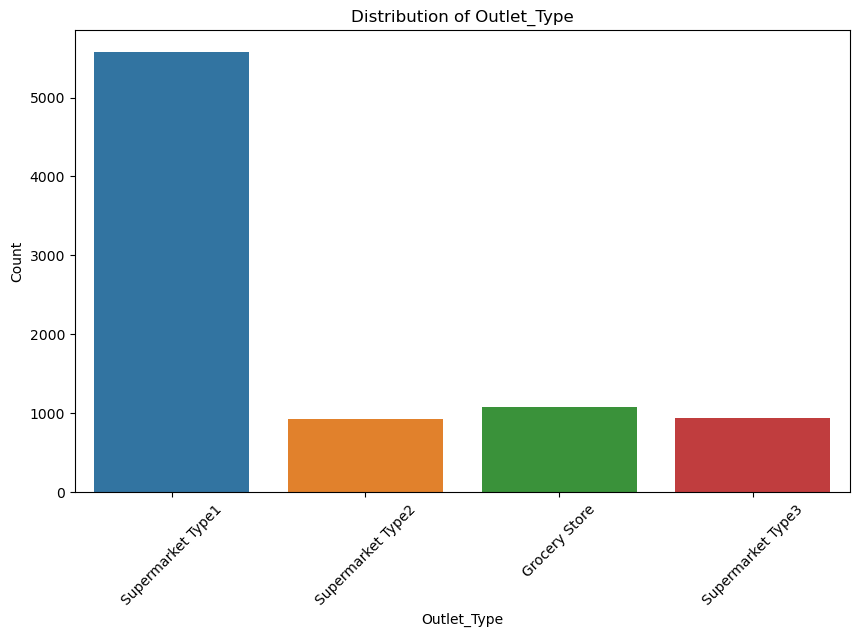

In [130]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# visualizations

relationship between 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'

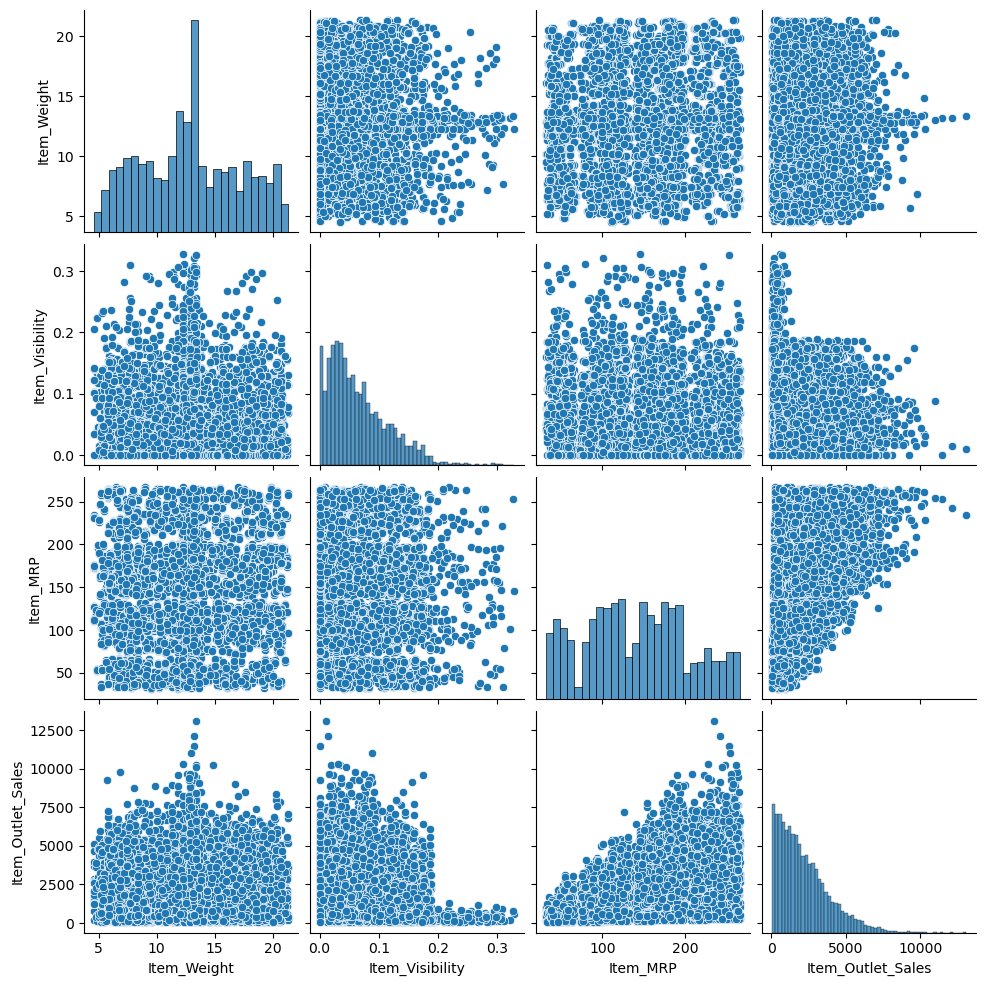

In [131]:
selected_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
subset_df = train_df[selected_columns]

# Create a pair plot
sns.pairplot(subset_df)
plt.show()

numerical_features distribution

<Figure size 1000x600 with 0 Axes>

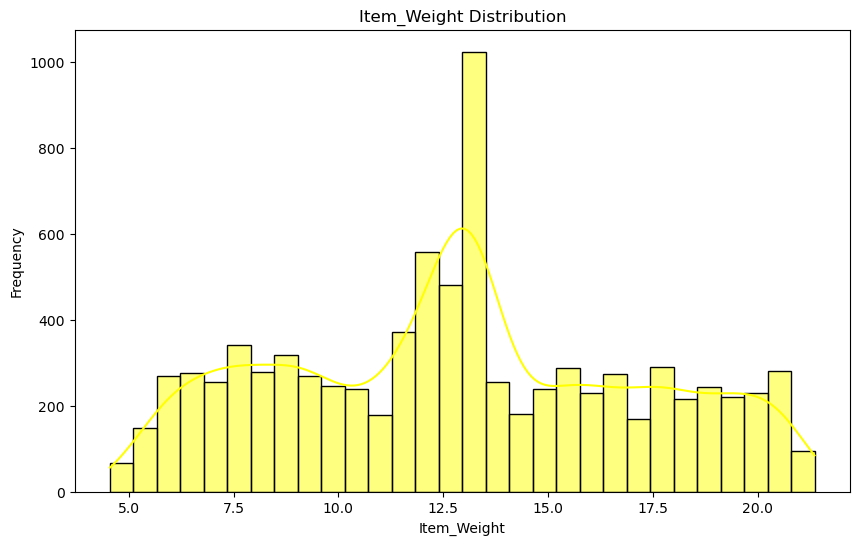

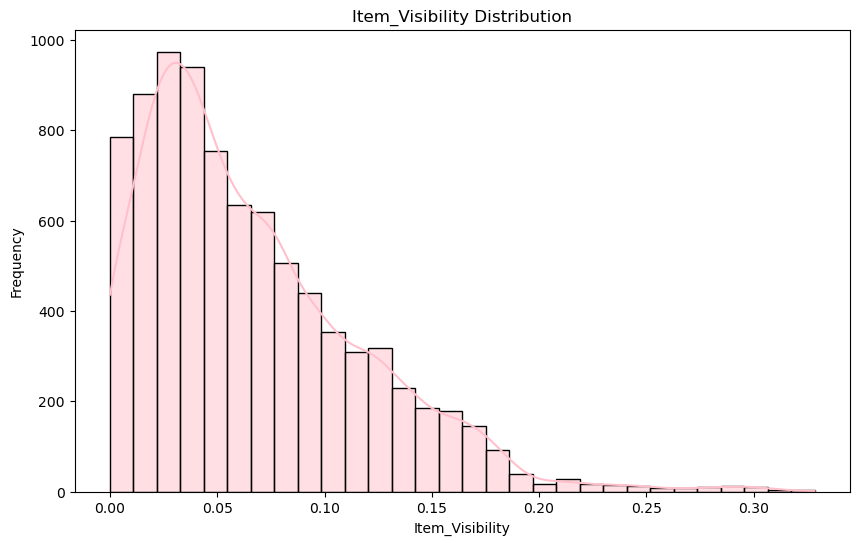

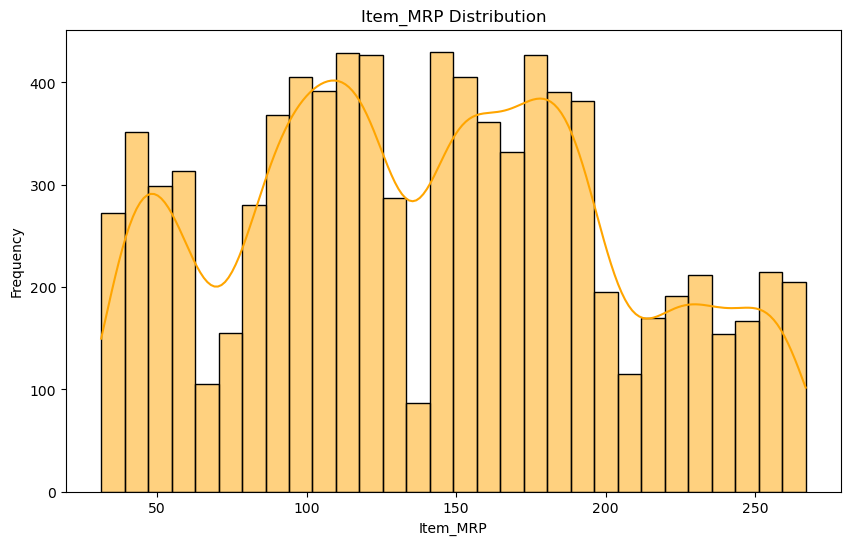

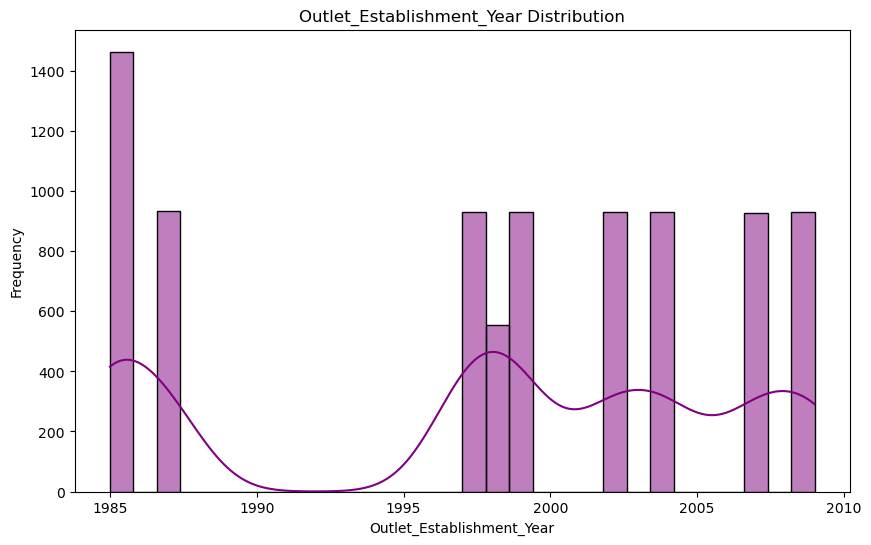

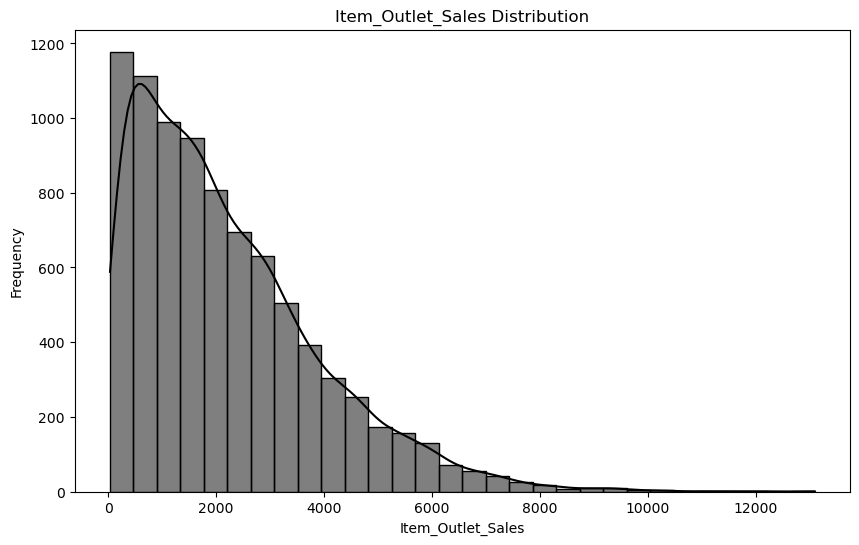

In [132]:
plt.figure(figsize=(10, 6))

# Define a list of colors to use for each column
colors = ['yellow', 'pink', 'orange', 'purple', 'black']

for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[column], bins=30, kde=True, color=colors[i % len(colors)])
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

categorical_features

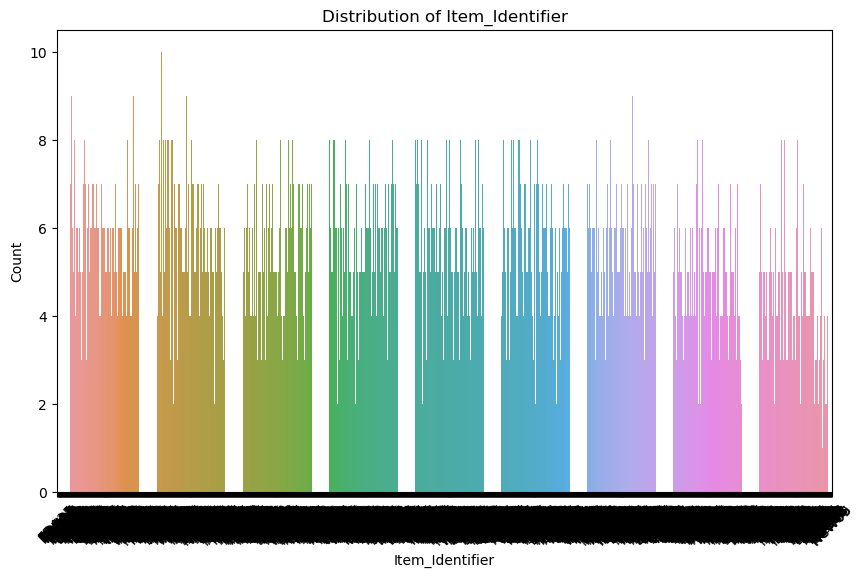

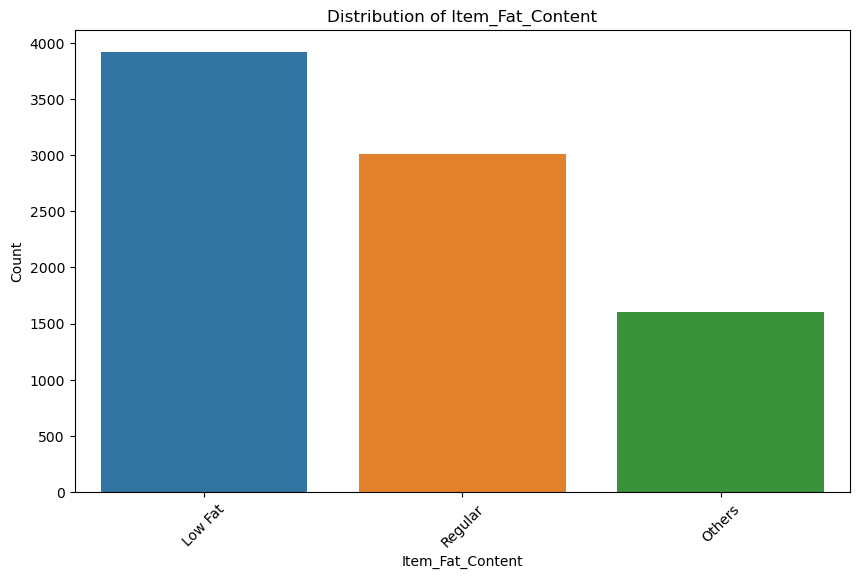

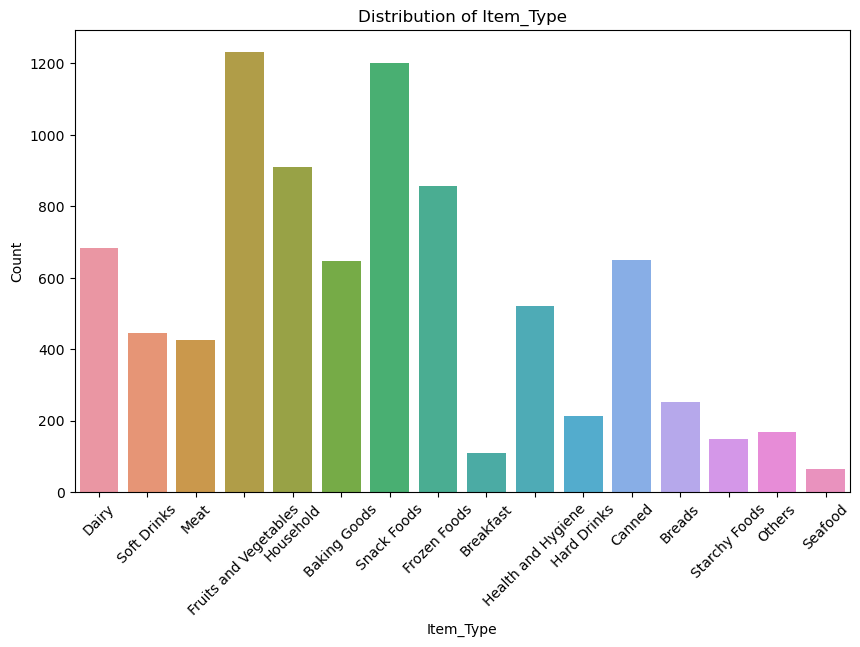

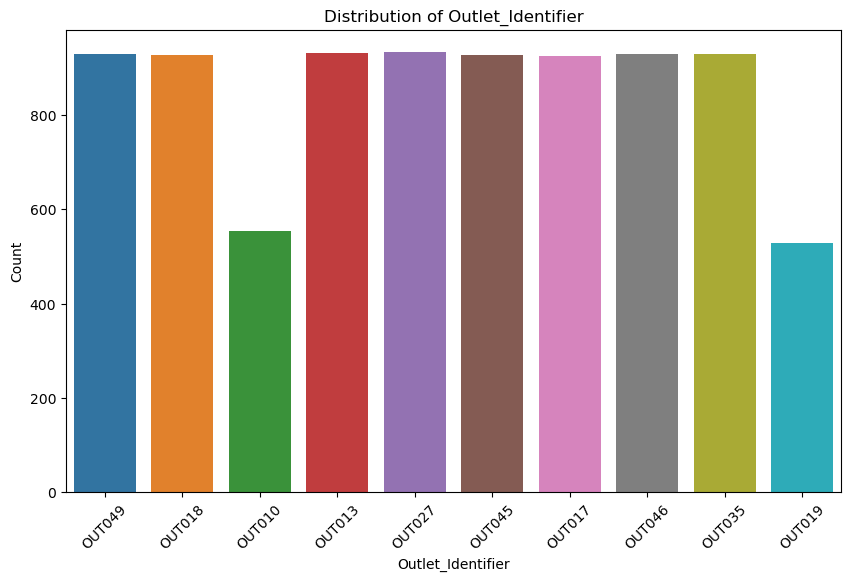

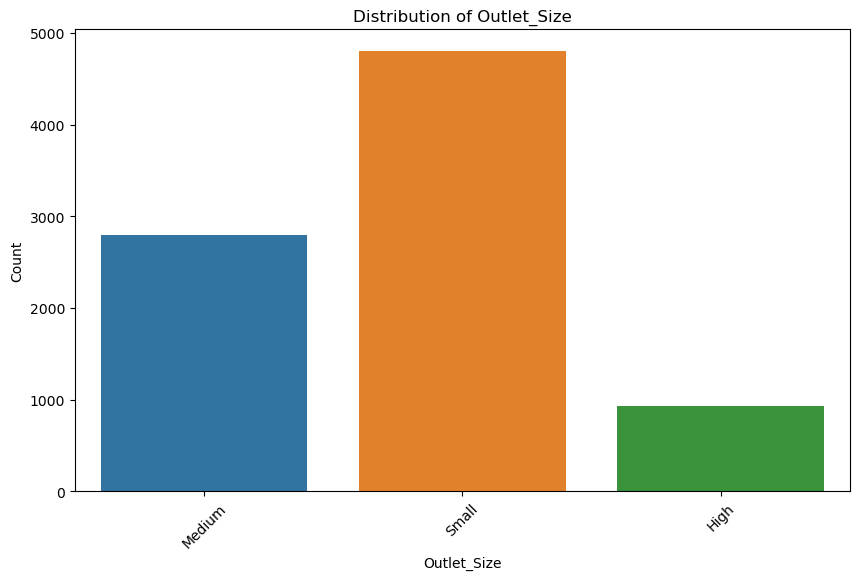

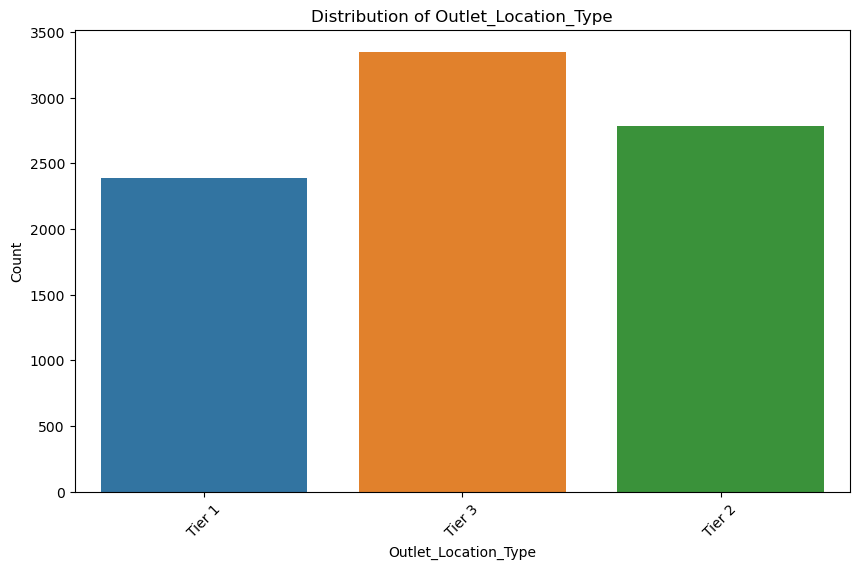

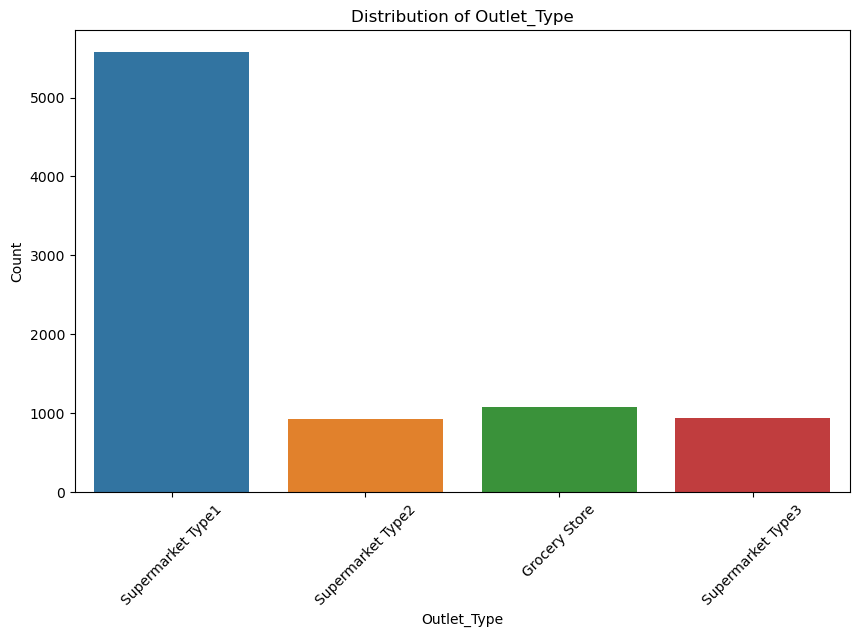

In [133]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

correlation materix

A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables. Correlation coefficients quantify the strength and direction of a linear relationship between two variables.

The correlation coefficient is a statistical measure that ranges from -1 to 1. Here's what the values typically indicate:

1: A perfect positive correlation. This means that as one variable increases, the other variable also increases proportionally.

0: No correlation. There is no linear relationship between the two variables.

-1: A perfect negative correlation. This means that as one variable increases, the other variable decreases proportionally.



In [134]:
correlation_matrix = train_df.corr(numeric_only=True)
correlation_matrix

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.011620  0.025821   
Item_Visibility              -0.011620         1.000000 -0.001315   
Item_MRP                      0.025821        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008376        -0.074834  0.005020   
Item_Outlet_Sales             0.012088        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008376           0.012088  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

Correlation for ITEM_WEIGHT:

Item_Weight:
Correlation with itself (diagonal): 1.000000 (perfect positive correlation, as expected).

Correlation with other variables:

Item_Visibility: -0.007339 (very close to zero, indicating a weak or negligible correlation).

Item_MRP: 0.027236 (a weak positive correlation).

Outlet_Establishment_Year: -0.010122 (a weak negative correlation).

Item_Outlet_Sales: 0.010553 (a weak positive correlation).

Correlation for ITEM_MRP:
Item_MRP:
Correlation with itself: 1.000000 (perfect positive correlation, as expected).

Correlation with other variables:

Correlation with Item_Weight: 0.027236 (a weak positive correlation).

Correlation with Item_Visibility: 0.003747 (very close to zero).

Outlet_Establishment_Year: 0.025835 (a weak positive correlation).

Item_Outlet_Sales: 0.560533 (a moderate positive correlation).

Correlation for ITEM_VISIBILITY:

Item_Visibility:Correlation with itself: 1.000000 (perfect positive correlation, as expected).

Correlation with other variables:

Correlation with Item_Weight: -0.007339 (very close to zero).

Item_MRP: 0.003747 (very close to zero).

Outlet_Establishment_Year: -0.030364 (a weak negative correlation).

Item_Outlet_Sales: -0.067364 (a weak negative correlation).

Correlation for Outlet_Establishment_Year:

Outlet_Establishment_Year:Correlation with itself: 1.000000 (perfect positive correlation, as expected).

Correlation with other variables:

Correlation with Item_Weight: -0.010122 (a weak negative correlation).

Correlation with Item_Visibility: -0.030364 (a weak negative correlation).

Correlation with Item_MRP: 0.025835 (a weak positive correlation).

Correlation with Item_Outlet_Sales: -0.010993 (a weak negative correlation).

Correlation for Item_Outlet_Sales:

Item_Outlet_Sales:Correlation with itself: 1.000000 (perfect positive correlation, as expected).

Correlation with other variables:

Correlation with Item_Weight: 0.010553 (a weak positive correlation).

Correlation with Item_Visibility: -0.067364 (a weak negative correlation).

Correlation with Item_MRP: 0.560533 (a moderate positive correlation).

Correlation with Outlet_Establishment_Year: -0.010993 (a weak negative correlation).


HeatMAP using Correlation Matrix

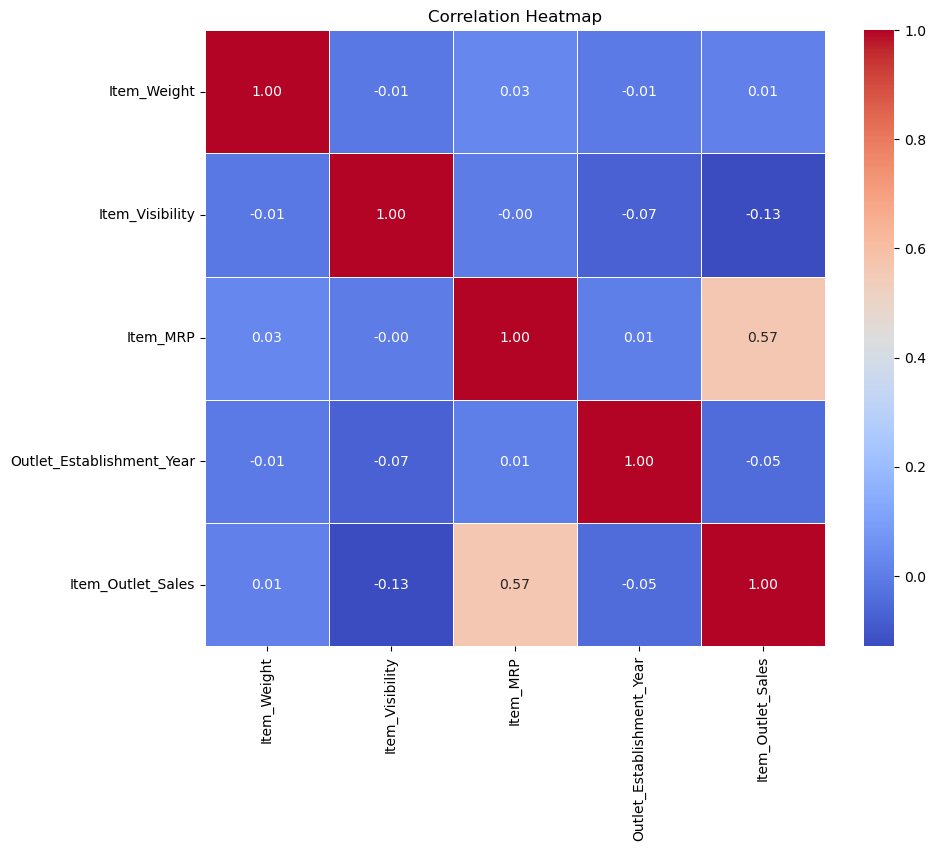

In [135]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Hypothesis Testing

Parametric Tests:
#t-Test:
Independent Samples t-Test: Compares means of two independent groups.
Paired Samples t-Test: Compares means of two related groups.
#ANOVA (Analysis of Variance):
One-Way ANOVA: Compares means of three or more independent groups.
Two-Way ANOVA: Examines the influence of two different independent variables.
#Z-Test:
Similar to the t-test but used when the population standard deviation is known.

# HYPOTHESIS:

Store Capacity:

H0: There is no significant difference in sales between big and small stores.

H1: Big-sized stores have significantly higher sales.
Statistical Test: Two-sample t-test or ANOVA.

In [136]:
# Separate the data into two groups based on Store Capacity
big_stores_sales = train_df[train_df['Outlet_Location_Type'] == 'Big']['Item_Outlet_Sales']
small_stores_sales = train_df[train_df['Outlet_Location_Type'] == 'Small']['Item_Outlet_Sales']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(big_stores_sales, small_stores_sales, equal_var=False)

# Set the significance level
alpha = 0.05

# Check the p-value and make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Big-sized stores have significantly higher sales.")
else:
    print("Fail to reject the null hypothesis. No significant difference in sales between big and small stores.")


Fail to reject the null hypothesis. No significant difference in sales between big and small stores.


City Type and sales

Null Hypothesis (H0): There is no significant difference in sales between stores in different city types.

Alternative Hypothesis (H1): Stores in urban or Tier 1 cities have significantly higher sales.
Statistical Test: Two-sample t-test or ANOVA.

In [137]:
from scipy.stats import f_oneway
item_types = train_df['Item_Type'].unique()
item_type_groups = [train_df[train_df['Item_Type'] == item_type]['Item_Outlet_Sales'] for item_type in item_types]
f_stat, p_value = f_oneway(*item_type_groups)

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. Sales differ significantly between item types.")
else:
    print("Fail to reject the null hypothesis. No significant difference in sales between item types.")


Reject the null hypothesis. Sales differ significantly between item types.


Item_Visibility in Store:

H0: There is no significant correlation between product visibility and sales.

H1: Products with higher visibility have a significant positive correlation with sales.
Statistical Test: Correlation analysis.

In [138]:
# Select the relevant columns
visibility = train_df['Item_Visibility']
sales = train_df['Item_Outlet_Sales']
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(visibility, sales)
# Define the significance level (alpha)
alpha = 0.05
# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")
# Perform the hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between product visibility and sales.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between product visibility and sales.")


Pearson Correlation Coefficient: -0.1286246122207703
P-Value: 9.041287179923291e-33
Reject the null hypothesis: There is a significant correlation between product visibility and sales.


Item Type and Sales:
Hypothesis: Different types of items may have different sales.

Null Hypothesis (H0): There is no significant difference in sales between different item types.

Alternative Hypothesis (H1): Sales differ significantly between at least two item types

In [139]:
#Item Type and Sales
item_types = train_df['Item_Type'].unique()
item_type_groups = [train_df[train_df['Item_Type'] == item_type]['Item_Outlet_Sales'] for item_type in item_types]
# Perform ANOVA
f_stat, p_value = f_oneway(*item_type_groups)
# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. Sales differ significantly between item types.")
else:
    print("Fail to reject the null hypothesis. No significant difference in sales between item types.")


Reject the null hypothesis. Sales differ significantly between item types.


Outlet Type and Sales:
Hypothesis: Different outlet types may have different sales.

Null Hypothesis (H0): There is no significant difference in sales between different outlet types.

Alternative Hypothesis (H1): Sales differ significantly between at least two outlet types

In [140]:
#Get unique outlet types
outlet_types = train_df['Outlet_Type'].unique()
# Create data frames for each outlet type
outlet_type_sales = [train_df[train_df['Outlet_Type'] == outlet_type]['Item_Outlet_Sales'] for outlet_type in outlet_types]
# Perform ANOVA
anova_result = f_oneway(*outlet_type_sales)
# Define the significance level (alpha)
alpha = 0.05
# Print the ANOVA result
print("ANOVA Result:")
print(anova_result)
# Check if the p-value is less than alpha
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between different outlet types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between different outlet types.")


ANOVA Result:
F_onewayResult(statistic=894.6500119018012, pvalue=0.0)
Reject the null hypothesis: There is a significant difference in sales between different outlet types.


Outlet Size and Sales:

Hypothesis: The size of the outlet may impact sales.

Null Hypothesis (H0): There is no significant difference in sales based on outlet size.

Alternative Hypothesis (H1): Sales differ significantly between at least two outlet sizes.

In [141]:
from scipy.stats import f_oneway
# Get unique outlet sizes
outlet_sizes = train_df['Outlet_Size'].unique()
# Create data frames for each outlet size
outlet_size_sales = [train_df[train_df['Outlet_Size'] == outlet_size]['Item_Outlet_Sales'] for outlet_size in outlet_sizes]
# Perform ANOVA
anova_result = f_oneway(*outlet_size_sales)
# Define the significance level (alpha)
alpha = 0.05
# Print the ANOVA result
print("ANOVA Result:")
print(anova_result)
# Check if the p-value is less than alpha
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales based on outlet size.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales based on outlet size.")


ANOVA Result:
F_onewayResult(statistic=213.69096479853798, pvalue=2.8042418281729364e-91)
Reject the null hypothesis: There is a significant difference in sales based on outlet size.


# Feature Engineering

creating the column outlet_age based on outlet_establishment_year

In [142]:
import datetime
train_df['Outlet_Establishment_Year'] = train_df['Outlet_Establishment_Year'].astype(str)
# Calculate the age of the outlet
current_year = 2023
train_df['Outlet_Age'] = current_year - train_df['Outlet_Establishment_Year'].astype(int)
train_df.drop(columns=['Outlet_Establishment_Year'], inplace=True)


In [143]:
train_df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930           Others         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600           Others         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                     Dairy  249.8092            OUT049      Medium   
1               Soft Drinks   48.2692            OUT018      Medium   
2                      Meat  141.6180            OUT049      Medium   
3     Fruits and Vegetables  182.0950            OUT010       Small   
4                 Household   53.8614            OUT013        High   
...                     ...       ...               ...         ...   
8518            Snack Foods  214.5218            OUT013        High   
8519           Baking Goods  108.1570            OUT045       Small   
8520     Health and Hygiene   85.1224            OUT035       Small   
8521            Snack Foods  103.1332            OUT018      Medium   
8522            Soft Drinks   75.4670            OUT046       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0                  Tier 1  Supermarket Type1          3735.1380          24  
1                  Tier 3  Supermarket Type2           443.4228          14  
2                  Tier 1  Supermarket Type1          2097.2700          24  
3                  Tier 3      Grocery Store           732.3800          25  
4                  Tier 3  Supermarket Type1           994.7052          36  
...                   ...                ...                ...         ...  
8518               Tier 3  Supermarket Type1          2778.3834          36  
8519               Tier 2  Supermarket Type1           549.2850          21  
8520               Tier 2  Supermarket Type1          1193.1136          19  
8521               Tier 3  Supermarket Type2          1845.5976          14  
8522               Tier 1  Supermarket Type1           765.6700          26  

[8523 rows x 12 columns]

In [144]:
train_df['Outlet_Age'].describe()

count    8523.000000
mean       25.168133
std         8.371760
min        14.000000
25%        19.000000
50%        24.000000
75%        36.000000
max        38.000000
Name: Outlet_Age, dtype: float64

In [145]:
#Create broader category for type of item
train_df['Item_Type_Category'] = train_df['Item_Identifier'].astype(str).str[:3]
train_df['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

These seem to stand for Food, Drink and Non-Consumable. So rename them to be more intuitive.

In [146]:
train_df['Item_Type_Category'] = train_df['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [147]:
train_df['Item_Type_Category'] = train_df['Item_Identifier'].astype(str).str[:2]
train_df['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [148]:
train_df.drop(columns=['Item_Identifier'], inplace=True)

In [149]:
train_df

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930           Others         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600           Others         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0     249.8092            OUT049      Medium               Tier 1   
1      48.2692            OUT018      Medium               Tier 3   
2     141.6180            OUT049      Medium               Tier 1   
3     182.0950            OUT010       Small               Tier 3   
4      53.8614            OUT013        High               Tier 3   
...        ...               ...         ...                  ...   
8518  214.5218            OUT013        High               Tier 3   
8519  108.1570            OUT045       Small               Tier 2   
8520   85.1224            OUT035       Small               Tier 2   
8521  103.1332            OUT018      Medium               Tier 3   
8522   75.4670            OUT046       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Type_Category  
0     Supermarket Type1          3735.1380          24                 FD  
1     Supermarket Type2           443.4228          14                 DR  
2     Supermarket Type1          2097.2700          24                 FD  
3         Grocery Store           732.3800          25                 FD  
4     Supermarket Type1           994.7052          36                 NC  
...                 ...                ...         ...                ...  
8518  Supermarket Type1          2778.3834          36                 FD  
8519  Supermarket Type1           549.2850          21                 FD  
8520  Supermarket Type1          1193.1136          19                 NC  
8521  Supermarket Type2          1845.5976          14                 FD  
8522  Supermarket Type1           765.6700          26                 DR  

[8523 rows x 12 columns]

In [150]:
train_df['Item_Type_Category'].value_counts()

Item_Type_Category
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [151]:
#Change value of the 'Item_Fat_Content' of the items that are non-consumables.
train_df.loc[train_df['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
train_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3918
Regular    3006
Others     1599
Name: count, dtype: int64

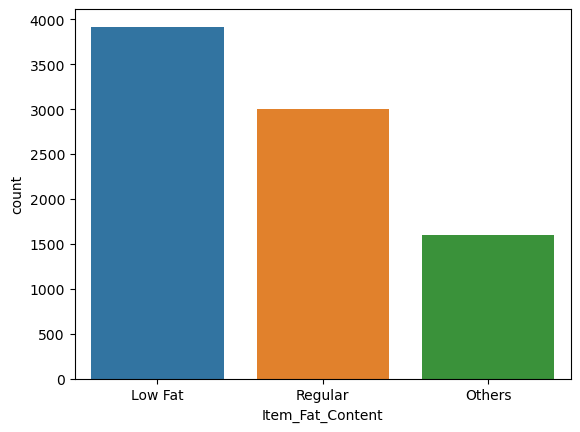

In [152]:
sns.countplot(x='Item_Fat_Content', data=train_df)
plt.show()

In [153]:
train=train_df.copy()
train

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930           Others         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600           Others         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0     249.8092            OUT049      Medium               Tier 1   
1      48.2692            OUT018      Medium               Tier 3   
2     141.6180            OUT049      Medium               Tier 1   
3     182.0950            OUT010       Small               Tier 3   
4      53.8614            OUT013        High               Tier 3   
...        ...               ...         ...                  ...   
8518  214.5218            OUT013        High               Tier 3   
8519  108.1570            OUT045       Small               Tier 2   
8520   85.1224            OUT035       Small               Tier 2   
8521  103.1332            OUT018      Medium               Tier 3   
8522   75.4670            OUT046       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Type_Category  
0     Supermarket Type1          3735.1380          24                 FD  
1     Supermarket Type2           443.4228          14                 DR  
2     Supermarket Type1          2097.2700          24                 FD  
3         Grocery Store           732.3800          25                 FD  
4     Supermarket Type1           994.7052          36                 NC  
...                 ...                ...         ...                ...  
8518  Supermarket Type1          2778.3834          36                 FD  
8519  Supermarket Type1           549.2850          21                 FD  
8520  Supermarket Type1          1193.1136          19                 NC  
8521  Supermarket Type2          1845.5976          14                 FD  
8522  Supermarket Type1           765.6700          26                 DR  

[8523 rows x 12 columns]

In [154]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Category']


In [155]:
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in categorical_cols:
    # Check if the column data type is object (categorical)
    if train[column].dtype == 'object':
        # Use label encoding for categorical columns
        train[column] = label_encoder.fit_transform(train[column])


In [156]:
train_df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93           Others         0.000000              Household   

   Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0  249.8092            OUT049      Medium               Tier 1   
1   48.2692            OUT018      Medium               Tier 3   
2  141.6180            OUT049      Medium               Tier 1   
3  182.0950            OUT010       Small               Tier 3   
4   53.8614            OUT013        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Type_Category  
0  Supermarket Type1          3735.1380          24                 FD  
1  Supermarket Type2           443.4228          14                 DR  
2  Supermarket Type1          2097.2700          24                 FD  
3      Grocery Store           732.3800          25                 FD  
4  Supermarket Type1           994.7052          36                 NC

#finding important features

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Type             0.401522
Outlet_Identifier       0.162325
Outlet_Location_Type    0.089367
Outlet_Age              0.049135
Item_Type               0.017048
Item_Fat_Content        0.015249
Item_Weight             0.012088
Item_Type_Category      0.011236
Item_Visibility        -0.128625
Outlet_Size            -0.162753
Name: Item_Outlet_Sales, dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

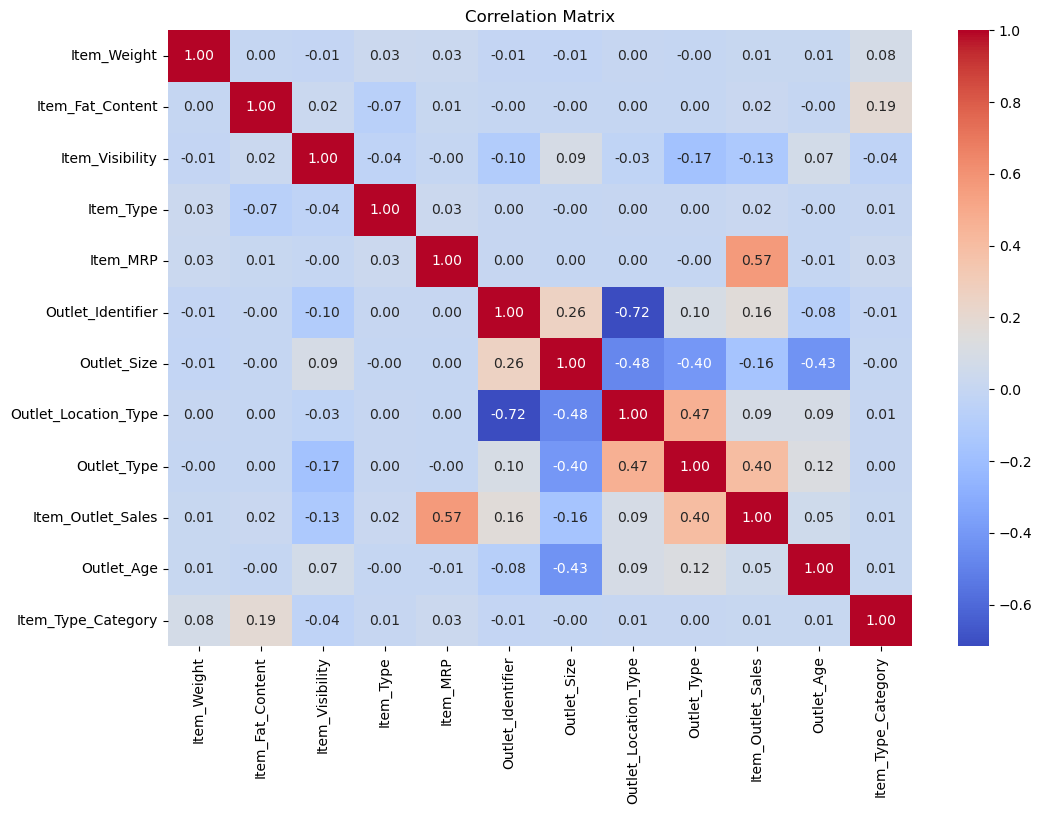

In [157]:
correlation_matrix = train.corr()

target_correlation = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False)
print(target_correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

Using RECURSIVE FEATURE ELIMINATION  to find out the important features

In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

model = LinearRegression()

num_features_to_select = 5
rfe = RFE(model, n_features_to_select=num_features_to_select)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Item_Visibility', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


Using RANDOM FOREST REGRESSOR to find out the important featues and plotting them

Feature Importances:
                  Feature  Importance
4               Item_MRP    0.447862
8            Outlet_Type    0.238966
2        Item_Visibility    0.108181
0            Item_Weight    0.064412
9             Outlet_Age    0.052777
3              Item_Type    0.037325
5      Outlet_Identifier    0.017609
1       Item_Fat_Content    0.012713
10    Item_Type_Category    0.008350
6            Outlet_Size    0.006006
7   Outlet_Location_Type    0.005799


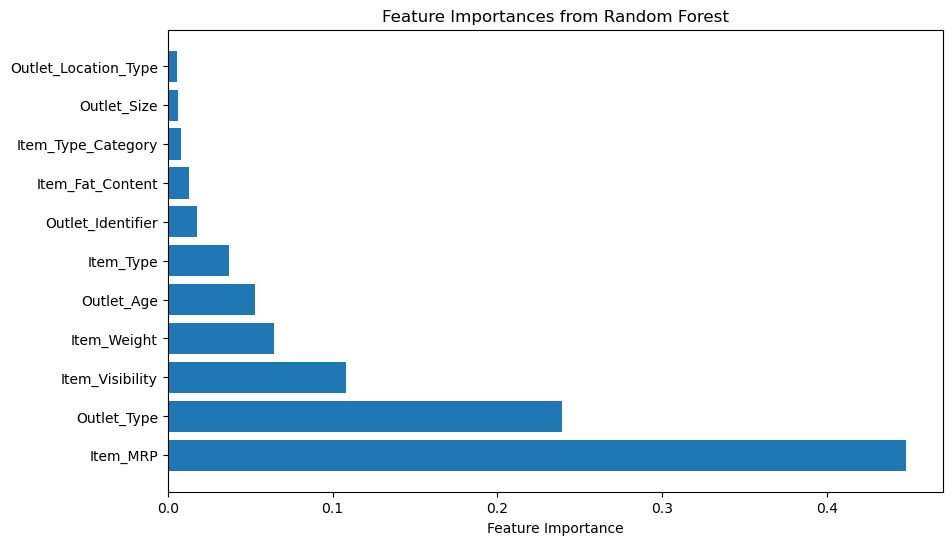

In [159]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

rf_model = RandomForestRegressor()

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


In [160]:
high_imp_features = ['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type' ]

In [161]:
med_imp_features = ['Item_Weight', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Age']

In [162]:
not_sure = ['Item_Type_Category']

#saving the high important features to new data set

In [163]:
High_Imp_Feature_Dataset = train[high_imp_features]


In [164]:
High_Imp_Feature_Dataset.to_csv('High_Imp_Feature_Dataset.csv', index=False)


In [165]:
High_Imp_Feature_Dataset.head(5)

Item_Visibility  Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type
0         0.016047  249.8092            1                     0            1
1         0.019278   48.2692            1                     2            2
2         0.016760  141.6180            1                     0            1
3         0.000000  182.0950            2                     2            0
4         0.000000   53.8614            0                     2            1

#saving medium important features to new dataset

In [166]:
Medium_Imp_Feature_Dataset = train[med_imp_features]
Medium_Imp_Feature_Dataset.to_csv('Medium_Imp_Feature_Dataset.csv', index=False)

In [167]:
Medium_Imp_Feature_Dataset.head(5)

Item_Weight  Item_Fat_Content  Item_Type  Outlet_Identifier  Outlet_Age
0         9.30                 0          4                  9          24
1         5.92                 2         14                  3          14
2        17.50                 0         10                  9          24
3        19.20                 2          6                  0          25
4         8.93                 1          9                  1          36

#saving the not sure feature in the dataset

In [168]:
Not_Sure_Feature_Dataset = train[not_sure]
Not_Sure_Feature_Dataset.to_csv('Not_Sure_Feature_Dataset.csv', index=False)

In [169]:
Not_Sure_Feature_Dataset.head(5)

Item_Type_Category
0                   1
1                   0
2                   1
3                   1
4                   2

In [170]:
#train_df 

In [171]:
train_df.head(50)

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0      9.300000          Low Fat         0.016047                  Dairy   
1      5.920000          Regular         0.019278            Soft Drinks   
2     17.500000          Low Fat         0.016760                   Meat   
3     19.200000          Regular         0.000000  Fruits and Vegetables   
4      8.930000           Others         0.000000              Household   
5     10.395000          Regular         0.000000           Baking Goods   
6     13.650000          Regular         0.012741            Snack Foods   
7     12.987880          Low Fat         0.127470            Snack Foods   
8     16.200000          Regular         0.016687           Frozen Foods   
9     19.200000          Regular         0.094450           Frozen Foods   
10    11.800000          Low Fat         0.000000  Fruits and Vegetables   
11    18.500000          Regular         0.045464                  Dairy   
12    15.100000          Regular         0.100014  Fruits and Vegetables   
13    17.600000          Regular         0.047257            Snack Foods   
14    16.350000          Low Fat         0.068024  Fruits and Vegetables   
15     9.000000          Regular         0.069089              Breakfast   
16    11.800000           Others         0.008596     Health and Hygiene   
17     9.000000          Regular         0.069196              Breakfast   
18    11.400328          Low Fat         0.034238            Hard Drinks   
19    13.350000          Low Fat         0.102492                  Dairy   
20    18.850000          Regular         0.138190            Snack Foods   
21    12.277108          Regular         0.035400           Baking Goods   
22    14.600000           Others         0.025698              Household   
23    12.277108          Low Fat         0.057557           Baking Goods   
24    13.850000          Regular         0.025896           Frozen Foods   
25    13.000000           Others         0.099887              Household   
26     7.645000          Regular         0.066693            Snack Foods   
27    11.650000          Low Fat         0.019356            Hard Drinks   
28     5.925000          Regular         0.161467                  Dairy   
29    12.305705          Regular         0.072222                 Canned   
30    19.250000          Low Fat         0.170349                  Dairy   
31    18.600000           Others         0.080829     Health and Hygiene   
32    18.700000          Low Fat         0.000000            Snack Foods   
33    17.850000          Low Fat         0.000000                 Breads   
34    17.500000          Low Fat         0.097904            Soft Drinks   
35    10.000000           Others         0.089291     Health and Hygiene   
36    13.224769          Regular         0.059512  Fruits and Vegetables   
37     8.850000          Regular         0.113124            Soft Drinks   
38    12.987880          Regular         0.123111            Snack Foods   
39    12.987880          Low Fat         0.026481            Snack Foods   
40    13.350000          Low Fat         0.102512                  Dairy   
41     9.800000          Low Fat         0.026818                   Meat   
42    13.600000          Low Fat         0.117818            Snack Foods   
43    21.350000          Low Fat         0.069103                 Canned   
44    12.150000          Regular         0.042278                 Canned   
45     6.420000          Low Fat         0.089499                  Dairy   
46    19.600000           Others         0.000000     Health and Hygiene   
47    10.000000          Low Fat         0.025880                 Canned   
48    15.850000          Regular         0.121633           Baking Goods   
49    13.426069          Regular         0.255395                  Dairy   

    Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0   249.8092            OUT049      Medium               Tie

In [172]:
train_df.shape

(8523, 12)

In [173]:
categorical_columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Type_Category']


In [174]:
number = LabelEncoder()
for i in categorical_columns:
        train_df[i]= number.fit_transform(train_df[i])

In [175]:
train_df.head(50)

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0      9.300000                 0         0.016047          4  249.8092   
1      5.920000                 2         0.019278         14   48.2692   
2     17.500000                 0         0.016760         10  141.6180   
3     19.200000                 2         0.000000          6  182.0950   
4      8.930000                 1         0.000000          9   53.8614   
5     10.395000                 2         0.000000          0   51.4008   
6     13.650000                 2         0.012741         13   57.6588   
7     12.987880                 0         0.127470         13  107.7622   
8     16.200000                 2         0.016687          5   96.9726   
9     19.200000                 2         0.094450          5  187.8214   
10    11.800000                 0         0.000000          6   45.5402   
11    18.500000                 2         0.045464          4  144.1102   
12    15.100000                 2         0.100014          6  145.4786   
13    17.600000                 2         0.047257         13  119.6782   
14    16.350000                 0         0.068024          6  196.4426   
15     9.000000                 2         0.069089          2   56.3614   
16    11.800000                 1         0.008596          8  115.3492   
17     9.000000                 2         0.069196          2   54.3614   
18    11.400328                 0         0.034238          7  113.2834   
19    13.350000                 0         0.102492          4  230.5352   
20    18.850000                 2         0.138190         13  250.8724   
21    12.277108                 2         0.035400          0  144.5444   
22    14.600000                 1         0.025698          9  196.5084   
23    12.277108                 0         0.057557          0  107.6938   
24    13.850000                 2         0.025896          5  165.0210   
25    13.000000                 1         0.099887          9   45.9060   
26     7.645000                 2         0.066693         13   42.3112   
27    11.650000                 0         0.019356          7   39.1164   
28     5.925000                 2         0.161467          4   45.5086   
29    12.305705                 2         0.072222          3   43.6454   
30    19.250000                 0         0.170349          4   55.7956   
31    18.600000                 1         0.080829          8   96.4436   
32    18.700000                 0         0.000000         13  256.6672   
33    17.850000                 0         0.000000          1   93.1436   
34    17.500000                 0         0.097904         14  174.8738   
35    10.000000                 1         0.089291          8  146.7102   
36    13.224769                 2         0.059512          6  128.0678   
37     8.850000                 2         0.113124         14  122.5388   
38    12.987880                 2         0.123111         13   36.9874   
39    12.987880                 0         0.026481         13   87.6198   
40    13.350000                 0         0.102512          4  230.6352   
41     9.800000                 0         0.026818         10  126.0020   
42    13.600000                 0         0.117818         13  192.9136   
43    21.350000                 0         0.069103          3  259.9278   
44    12.150000                 2         0.042278          3  126.5046   
45     6.420000                 0         0.089499          4  178.1002   
46    19.600000                 1         0.000000          8  153.3024   
47    10.000000                 0         0.025880          3  265.2226   
48    15.850000                 2         0.121633          0   60.6220   
49    13.426069                 2         0.255395          4  196.8794   

    Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                   9            1                     0            1   
1                   3           

#finding important features

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Type             0.401522
Outlet_Identifier       0.162325
Outlet_Location_Type    0.089367
Outlet_Age              0.049135
Item_Type               0.017048
Item_Fat_Content        0.015249
Item_Weight             0.012088
Item_Type_Category      0.011236
Item_Visibility        -0.128625
Outlet_Size            -0.162753
Name: Item_Outlet_Sales, dtype: float64


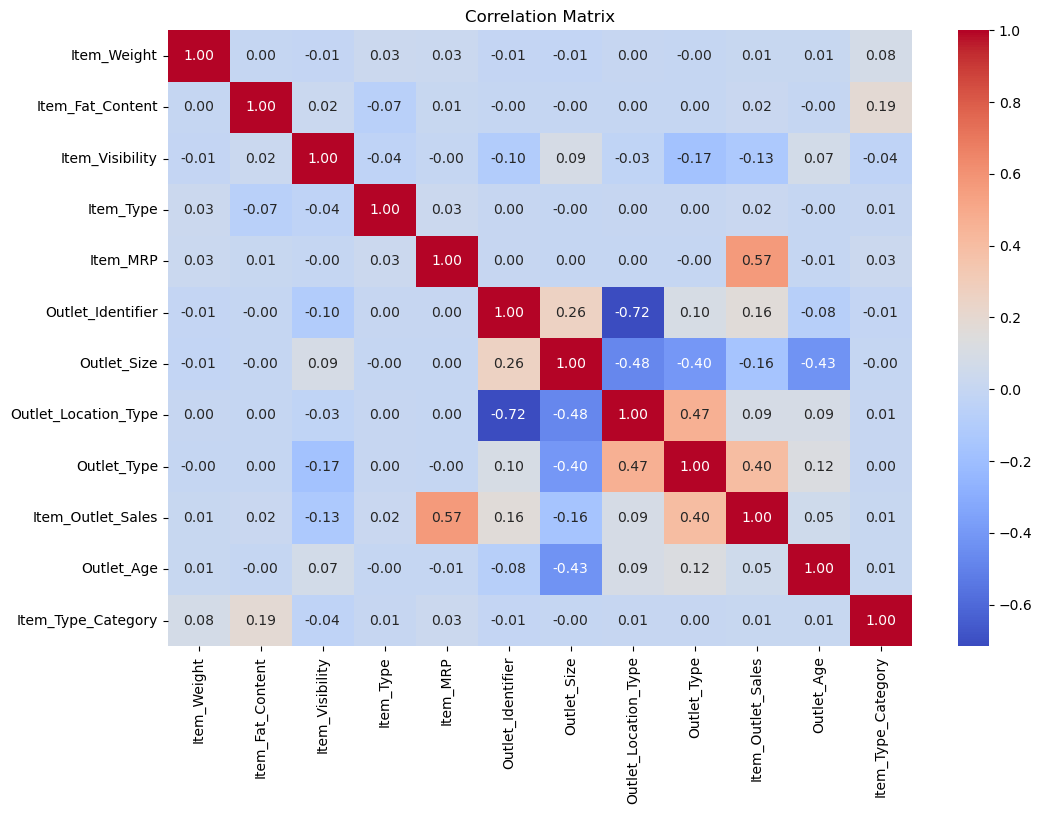

In [176]:
correlation_matrix = train_df.corr()

target_correlation = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False)
print(target_correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

Feature ranking:
1. feature 'Item_MRP' (0.4477)
2. feature 'Outlet_Type' (0.2309)
3. feature 'Item_Visibility' (0.1048)
4. feature 'Item_Weight' (0.0665)
5. feature 'Outlet_Age' (0.0587)
6. feature 'Item_Type' (0.0393)
7. feature 'Outlet_Identifier' (0.0173)
8. feature 'Item_Fat_Content' (0.0137)
9. feature 'Item_Type_Category' (0.0088)
10. feature 'Outlet_Size' (0.0063)
11. feature 'Outlet_Location_Type' (0.0059)


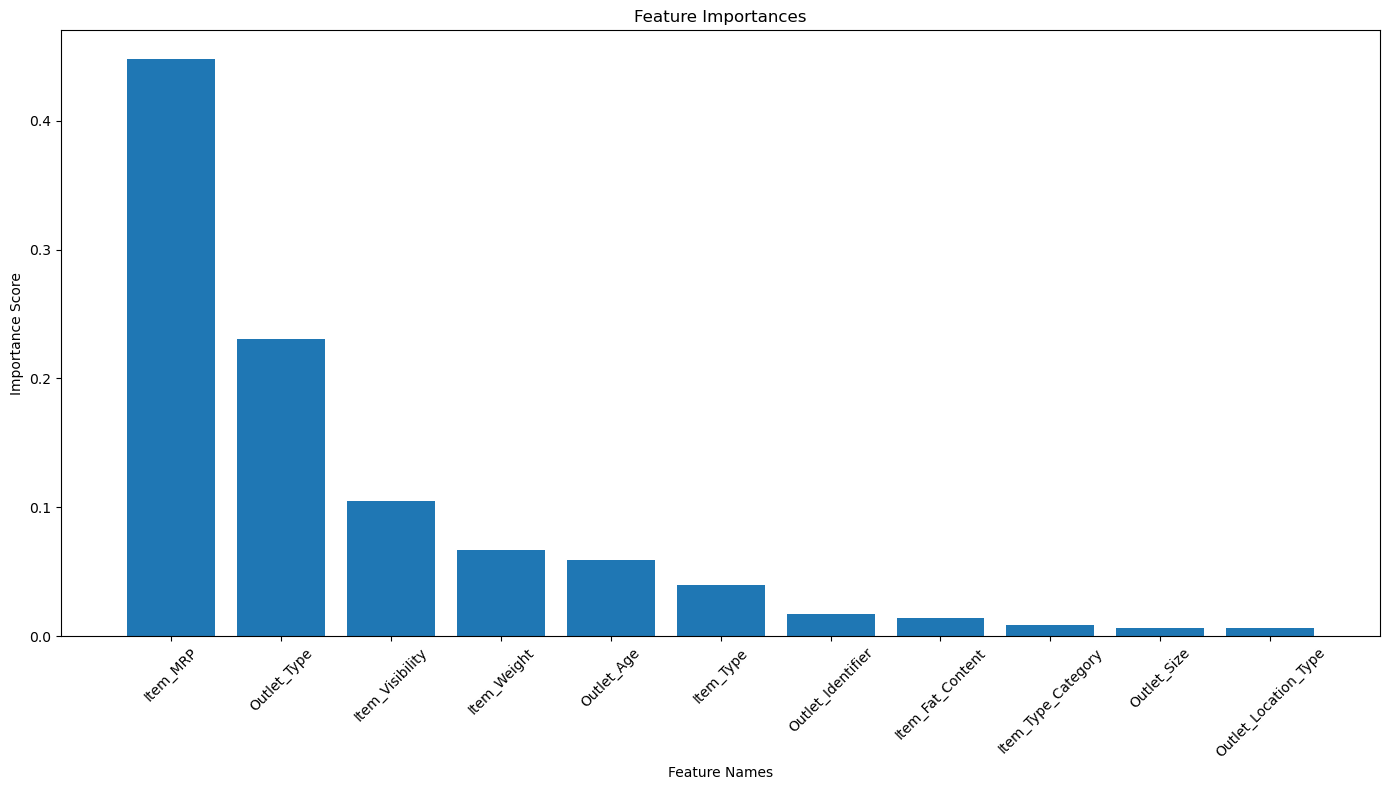

In [177]:
X = train_df.drop("Item_Outlet_Sales", axis=1)
y = train_df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature '{X_train.columns[indices[f]]}' ({importances[indices[f]]:.4f})")
# Plot the feature importances
plt.figure(figsize=(14, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=45)  # Display feature names on x-axis with rotation
plt.xlabel("Feature Names")
plt.ylabel("Importance Score")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


# Model Building

#model baseline error

In the context of machine learning, a baseline model is a simple model that provides a benchmark for the performance of more complex models. It is usually the first model that is built and serves as a reference point for future models

Polynomial Linear Regression


GridsearchCV

In [178]:
train_df

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                     9            1                     0            1   
1                     3            1                     2            2   
2                     9            1                     0            1   
3                     0            2                     2            0   
4                     1            0                     2            1   
...                 ...          ...                   ...          ...   
8518                  1            0                     2            1   
8519                  7            2                     1            1   
8520                  6            2                     1            1   
8521                  3            1                     2            2   
8522                  8            2                     0            1   

      Item_Outlet_Sales  Outlet_Age  Item_Type_Category  
0             3735.1380          24                   1  
1              443.4228          14                   0  
2             2097.2700          24                   1  
3              732.3800          25                   1  
4              994.7052          36                   2  
...                 ...         ...                 ...  
8518          2778.3834          36                   1  
8519           549.2850          21                   1  
8520          1193.1136          19                   2  
8521          1845.5976          14                   1  
8522           765.6700          26                   0  

[8523 rows x 12 columns]

In [179]:
X

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                     9            1                     0            1   
1                     3            1                     2            2   
2                     9            1                     0            1   
3                     0            2                     2            0   
4                     1            0                     2            1   
...                 ...          ...                   ...          ...   
8518                  1            0                     2            1   
8519                  7            2                     1            1   
8520                  6            2                     1            1   
8521                  3            1                     2            2   
8522                  8            2                     0            1   

      Outlet_Age  Item_Type_Category  
0             24                   1  
1             14                   0  
2             24                   1  
3             25                   1  
4             36                   2  
...          ...                 ...  
8518          36                   1  
8519          21                   1  
8520          19                   2  
8521          14                   1  
8522          26                   0  

[8523 rows x 11 columns]

In [180]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [181]:
X = train_df.drop("Item_Outlet_Sales", axis=1)
y = train_df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

polyscaler = StandardScaler()
X_train_scaled = polyscaler.fit_transform(X_train)
X_test_scaled = polyscaler.transform(X_test)

polyreg = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())


polyreg.fit(X_train_scaled, y_train)

y_pred_train = polyreg.predict(X_train_scaled)
y_pred_test = polyreg.predict(X_test_scaled)

# Compute metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Compute metrics for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100


# Training
print('Training RMSE:', rmse_train)
print('Training R2 Score:', r2_train)
print('Training MAPE:', mape_train)

# Test
print('Test RMSE:', rmse_test)
print('Test R2 Score:', r2_test)
print('Test MAPE:', mape_test)


Training RMSE: 1096.5264845207373
Training R2 Score: 0.5935260609625689
Training MAPE: 68.99280343771478
Test RMSE: 1032.4427207367053
Test R2 Score: 0.6078183550678062
Test MAPE: 68.78046327917396


In [182]:
y_pred_test

array([1419.0625,  769.8125,  494.25  , ...,  731.6875,  237.0625,
       1713.6875])

Random forest regression

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [184]:
X = train_df.drop("Item_Outlet_Sales", axis=1)
y = train_df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
model = RandomForestRegressor(max_depth = 5,min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)

In [186]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

In [187]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [188]:
# grid_search.fit(X_train, y_train)

In [189]:
# grid_search.best_params_

In [190]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5)

In [191]:

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Compute metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Compute metrics for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100


# Training
print('Training RMSE:', rmse_train)
print('Training R2 Score:', r2_train)
print('Training MAPE:', mape_train)

# Test
print('Test RMSE:', rmse_test)
print('Test R2 Score:', r2_test)
print('Test MAPE:', mape_test)

Training RMSE: 1077.4676229961078
Training R2 Score: 0.6075332107221363
Training MAPE: 54.417862452466395
Test RMSE: 1020.3375923927366
Test R2 Score: 0.6169609020949469
Test MAPE: 56.19863818337638


In [ ]:
#sav file

In [197]:
from joblib import dump

dump(model, 'model.sav')


['model.sav']

In [198]:
dump(scaler, 'scaler.sav')

['scaler.sav']